In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', delimiter=',')

C:\Users\estre\AppData\Local\Temp\ipykernel_5228\1027246833.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', delimiter=',')


In [3]:
class_maping={'B':0, 'S':1}
data['class'] = data['class'].map(class_maping)

In [4]:
data_variable_strange = data['TelephonyManager.getSimCountryIso']

In [5]:
data = data.drop(columns='TelephonyManager.getSimCountryIso')

In [6]:
data = data.drop_duplicates()
print("Número de duplicados después de eliminar:", data.duplicated().sum())

Número de duplicados después de eliminar: 0


In [7]:
!pip install prince

In [8]:
import pandas as pd
from prince import MCA

# Seleccionar las características (X) y la variable objetivo (y)
data_copia = data.copy()
X = data_copia.drop(columns='class')
y = data['class']

# Realizar MCA
mca = MCA(n_components=6)
mca_result = mca.fit_transform(X)
# Crear un nuevo DataFrame con las dimensiones principales y la variable 'class'
reduced_data = mca_result
reduced_data['class'] = y

# Imprimir el nuevo DataFrame con las dimensiones principales
reduced_data.head()

,0,1,2,3,4,5,class
0,-0.498156,0.058614,0.031934,-0.009259,-0.092423,0.043029,1
1,-0.442465,0.117612,-0.035576,-0.049780,-0.159673,0.042441,1
2,-0.436633,0.011888,-0.000791,-0.075759,-0.082283,0.076777,1
3,0.043108,0.105665,-0.401270,-0.172030,0.145143,-0.225135,1
4,-0.260519,0.000832,-0.138170,-0.429484,0.114657,0.287625,1


In [9]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(reduced_data, test_size=0.2, random_state=123)

In [10]:
from sklearn.utils import resample
clase_0 = train_data[train_data['class']== 0]
clase_1 = train_data[train_data['class']== 1]
# Submuestrea la clase sobrerrepresentada (en este caso, la clase 0).
display(clase_0.head())
class_0_subsampled = resample(clase_0, replace=False, n_samples=len(clase_1), random_state=123)

# Combina las clases equitativamente.
data_train = pd.concat([clase_1, class_0_subsampled])

,0,1,2,3,4,5,class
5585,0.238873,-0.153213,0.095628,-0.102491,-0.013660,0.073889,0
12419,-0.372867,0.005172,0.036406,-0.056618,0.037727,0.035736,0
11725,0.314559,0.242092,0.362604,0.057933,-0.077590,0.086221,0
8959,-0.426942,-0.028381,-0.040007,-0.020169,-0.013578,-0.094741,0
10790,0.074765,-0.149890,-0.034521,-0.016611,-0.100542,0.068805,0


In [11]:
labels_train = data_train['class']
features_train = data_train.drop(columns='class')
labels_test = test_data['class']
features_test = test_data.drop(columns='class')

#### Implementación cuántica

In [12]:
!pip install pylatexenc

In [13]:
!pip install openpyxl

In [14]:
!pip install qiskit

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc = SVC()
_ = svc.fit(features_train, labels_train)  

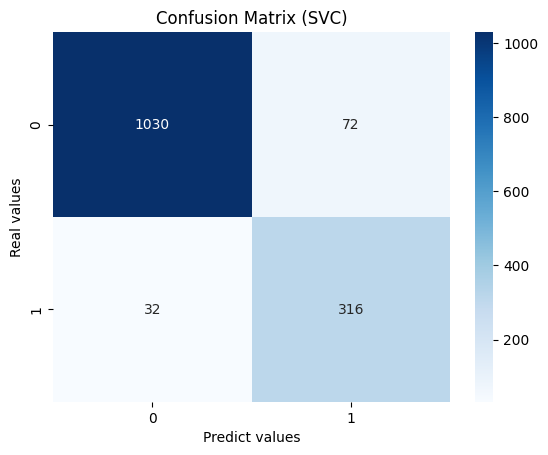

In [16]:
predictions = svc.predict(features_test)
import matplotlib.pyplot as plot
import seaborn as sns
confusion = confusion_matrix(labels_test, predictions)
sns.heatmap(confusion, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (SVC)")
plot.show()

In [17]:
train_score_c4 = svc.score(features_train, labels_train)
test_score_c4 = svc.score(features_test, labels_test)


print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.92
Classical SVC on the test dataset:     0.93


In [18]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1102
           1       0.81      0.91      0.86       348

    accuracy                           0.93      1450
   macro avg       0.89      0.92      0.91      1450
weighted avg       0.93      0.93      0.93      1450



In [19]:
num_obs_per_class = 100
selected_data = []

# Iterar sobre cada clase
for clase in reduced_data['class'].unique():
    # Seleccionar aleatoriamente 'num_obs_per_class' observaciones de cada clase
    selected_subset = reduced_data[reduced_data['class'] == clase].sample(n=num_obs_per_class, random_state=123)
    
    # Agregar el subconjunto seleccionado a la lista
    selected_data.append(selected_subset)

# Crear un nuevo DataFrame con las observaciones seleccionadas
selected_df = pd.concat(selected_data)

In [20]:
selected_df = selected_df.reset_index(drop=True)

In [21]:
labels = selected_df['class']
features = selected_df.drop(columns='class')

In [22]:
from sklearn.model_selection import train_test_split
# train_data, test_data = train_test_split(selected_df, test_size=0.2, random_state=123)
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=123)

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc = SVC()
_ = svc.fit(features_train, labels_train)

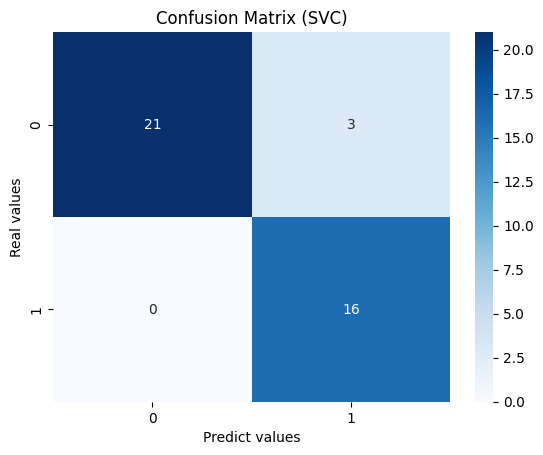

In [24]:
predictions = svc.predict(features_test)
import matplotlib.pyplot as plot
confusion = confusion_matrix(labels_test, predictions)
sns.heatmap(confusion, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (SVC)")
plot.show()

In [25]:
train_score_c4 = svc.score(features_train, labels_train)
test_score_c4 = svc.score(features_test, labels_test)


print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.90
Classical SVC on the test dataset:     0.93


c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


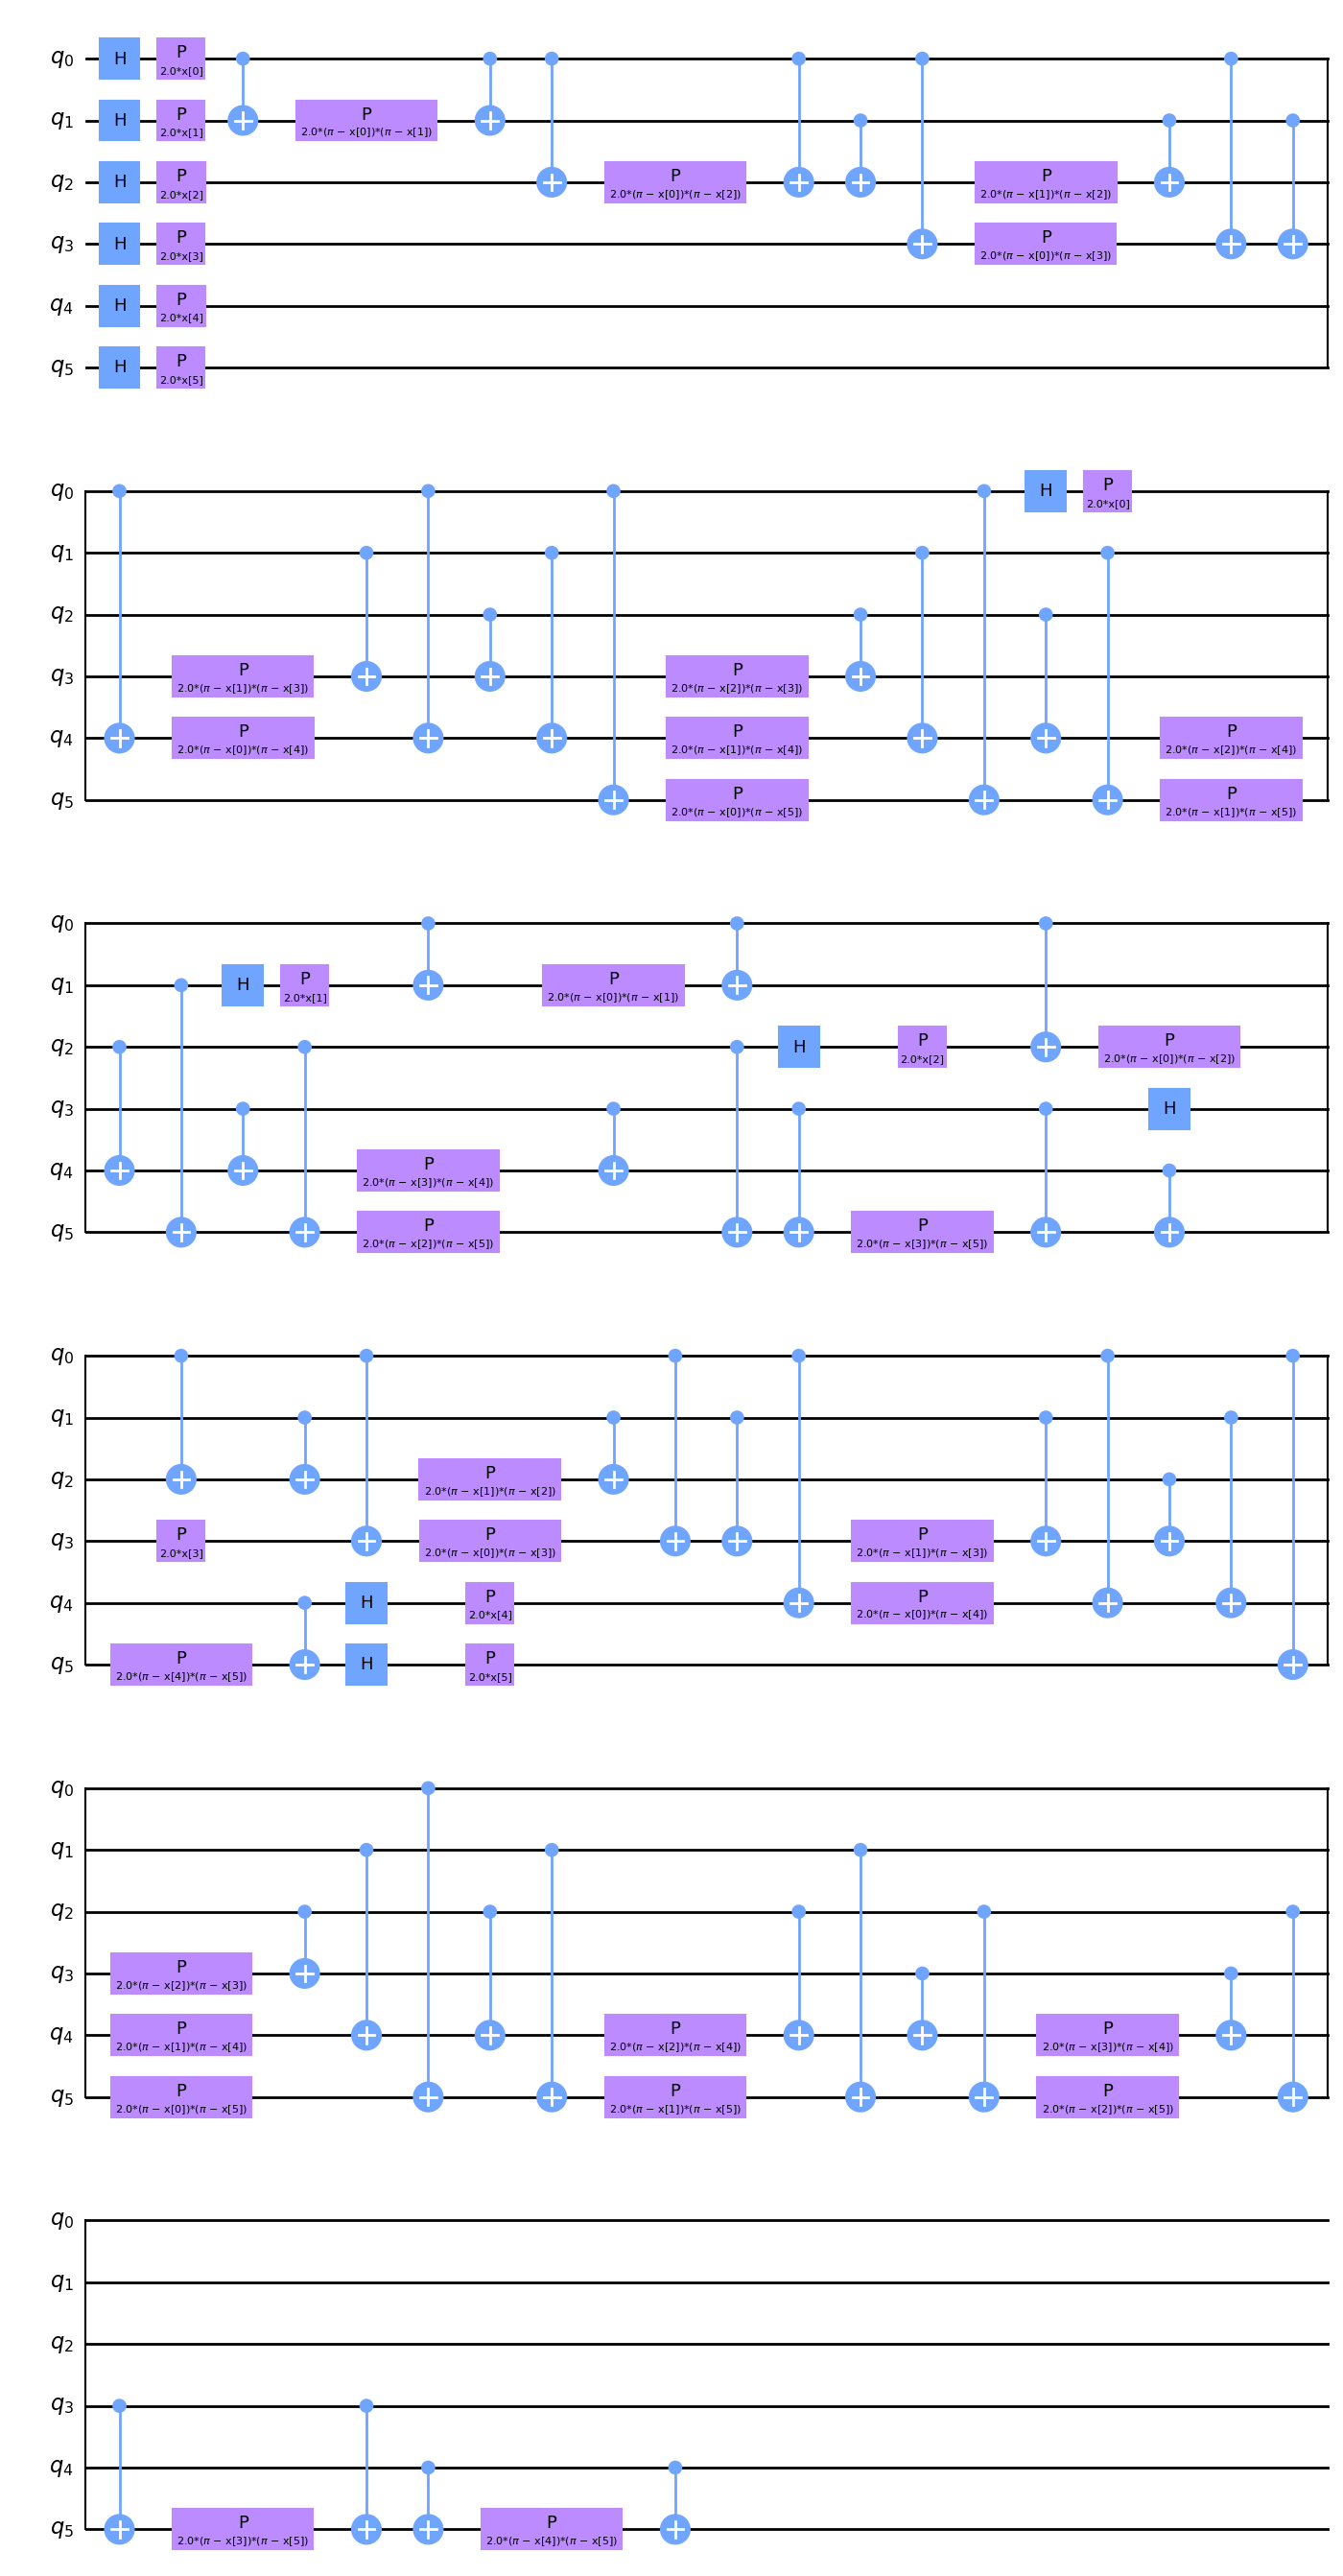

In [26]:
from qiskit.circuit.library import ZZFeatureMap
import matplotlib.pyplot as plt
num_features = features.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)
feature_map.decompose().draw(output="mpl", fold=20)

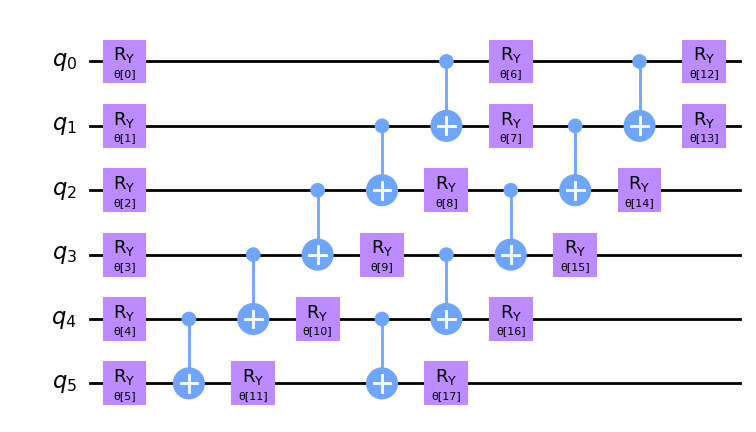

In [27]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

## SLSQP

In [28]:
from qiskit.algorithms.optimizers import SLSQP
optimizer = SLSQP(maxiter=25)

C:\Users\estre\AppData\Local\Temp\ipykernel_5228\657383429.py:1: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed in Qiskit 1.0. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import SLSQP


In [29]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [30]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [31]:
!pip install qiskit-machine-learning


In [32]:
import numpy as np
X_train_np = np.array(features_train.values)
y_train_np = labels_train.values

In [33]:
print("Shape of X_train_np:", X_train_np.shape)
print("Shape of y_train_np:", y_train_np.shape)

Shape of X_train_np: (160, 6)
Shape of y_train_np: (160,)


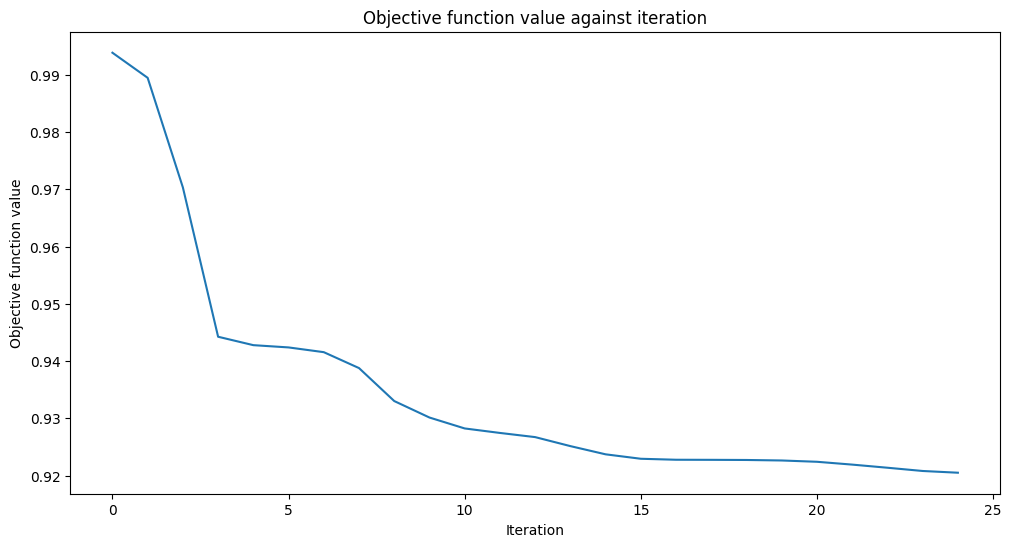

Training time: 1213 seconds


In [34]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [35]:
X_test_np = np.array(features_test.values)
y_test_np = labels_test.values

In [36]:
print("Shape of X_train_np:", X_test_np.shape)
print("Shape of y_train_np:", y_test_np.shape)

Shape of X_train_np: (40, 6)
Shape of y_train_np: (40,)


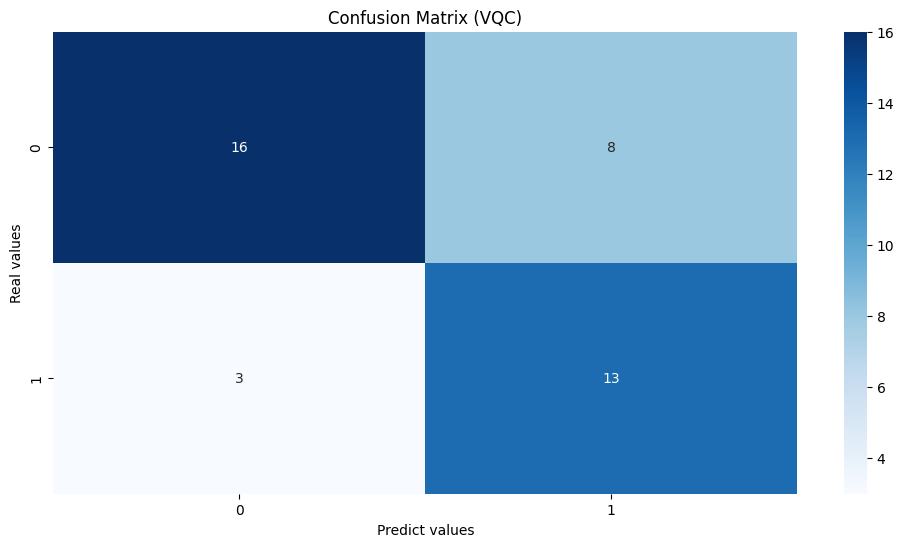

In [37]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [38]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.72
Quantum VQC on the test dataset:     0.72


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test_np, q_predictions,digits=6))

              precision    recall  f1-score   support

           0   0.842105  0.666667  0.744186        24
           1   0.619048  0.812500  0.702703        16

    accuracy                       0.725000        40
   macro avg   0.730576  0.739583  0.723444        40
weighted avg   0.752882  0.725000  0.727593        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


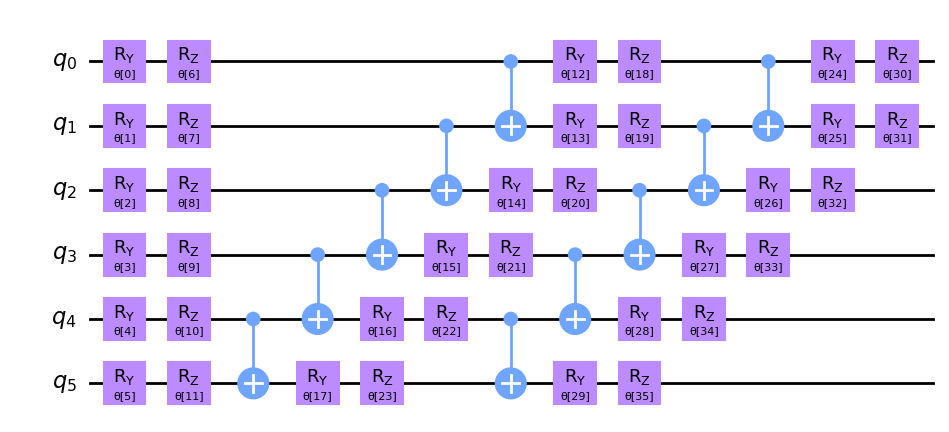

In [40]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

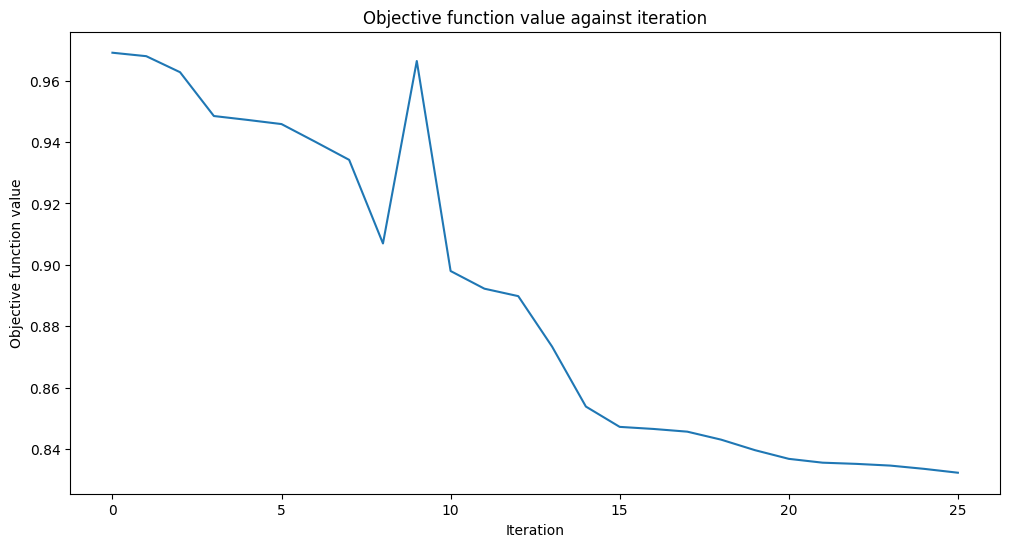

Training time: 2701 seconds


In [41]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

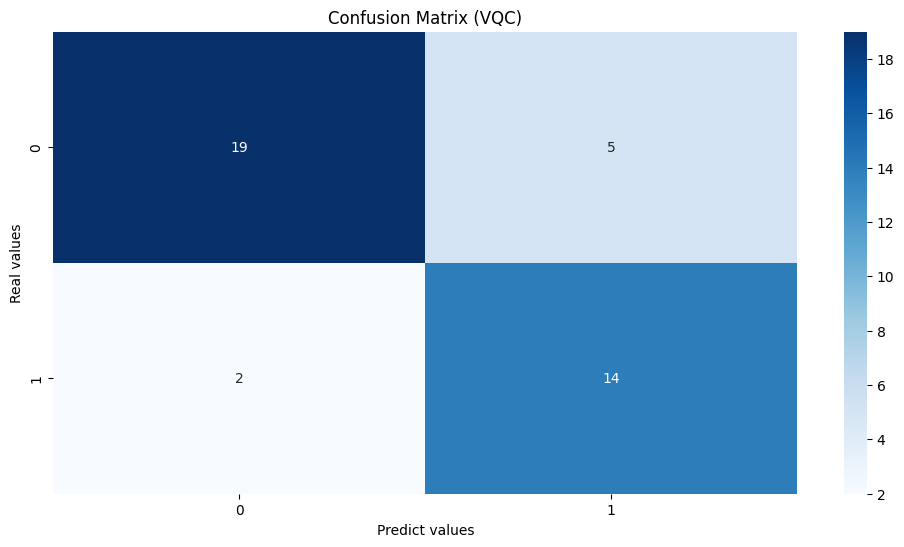

In [42]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [43]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.76
Quantum VQC on the test dataset:     0.82


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test_np, q_predictions,digits=6))

              precision    recall  f1-score   support

           0   0.904762  0.791667  0.844444        24
           1   0.736842  0.875000  0.800000        16

    accuracy                       0.825000        40
   macro avg   0.820802  0.833333  0.822222        40
weighted avg   0.837594  0.825000  0.826667        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


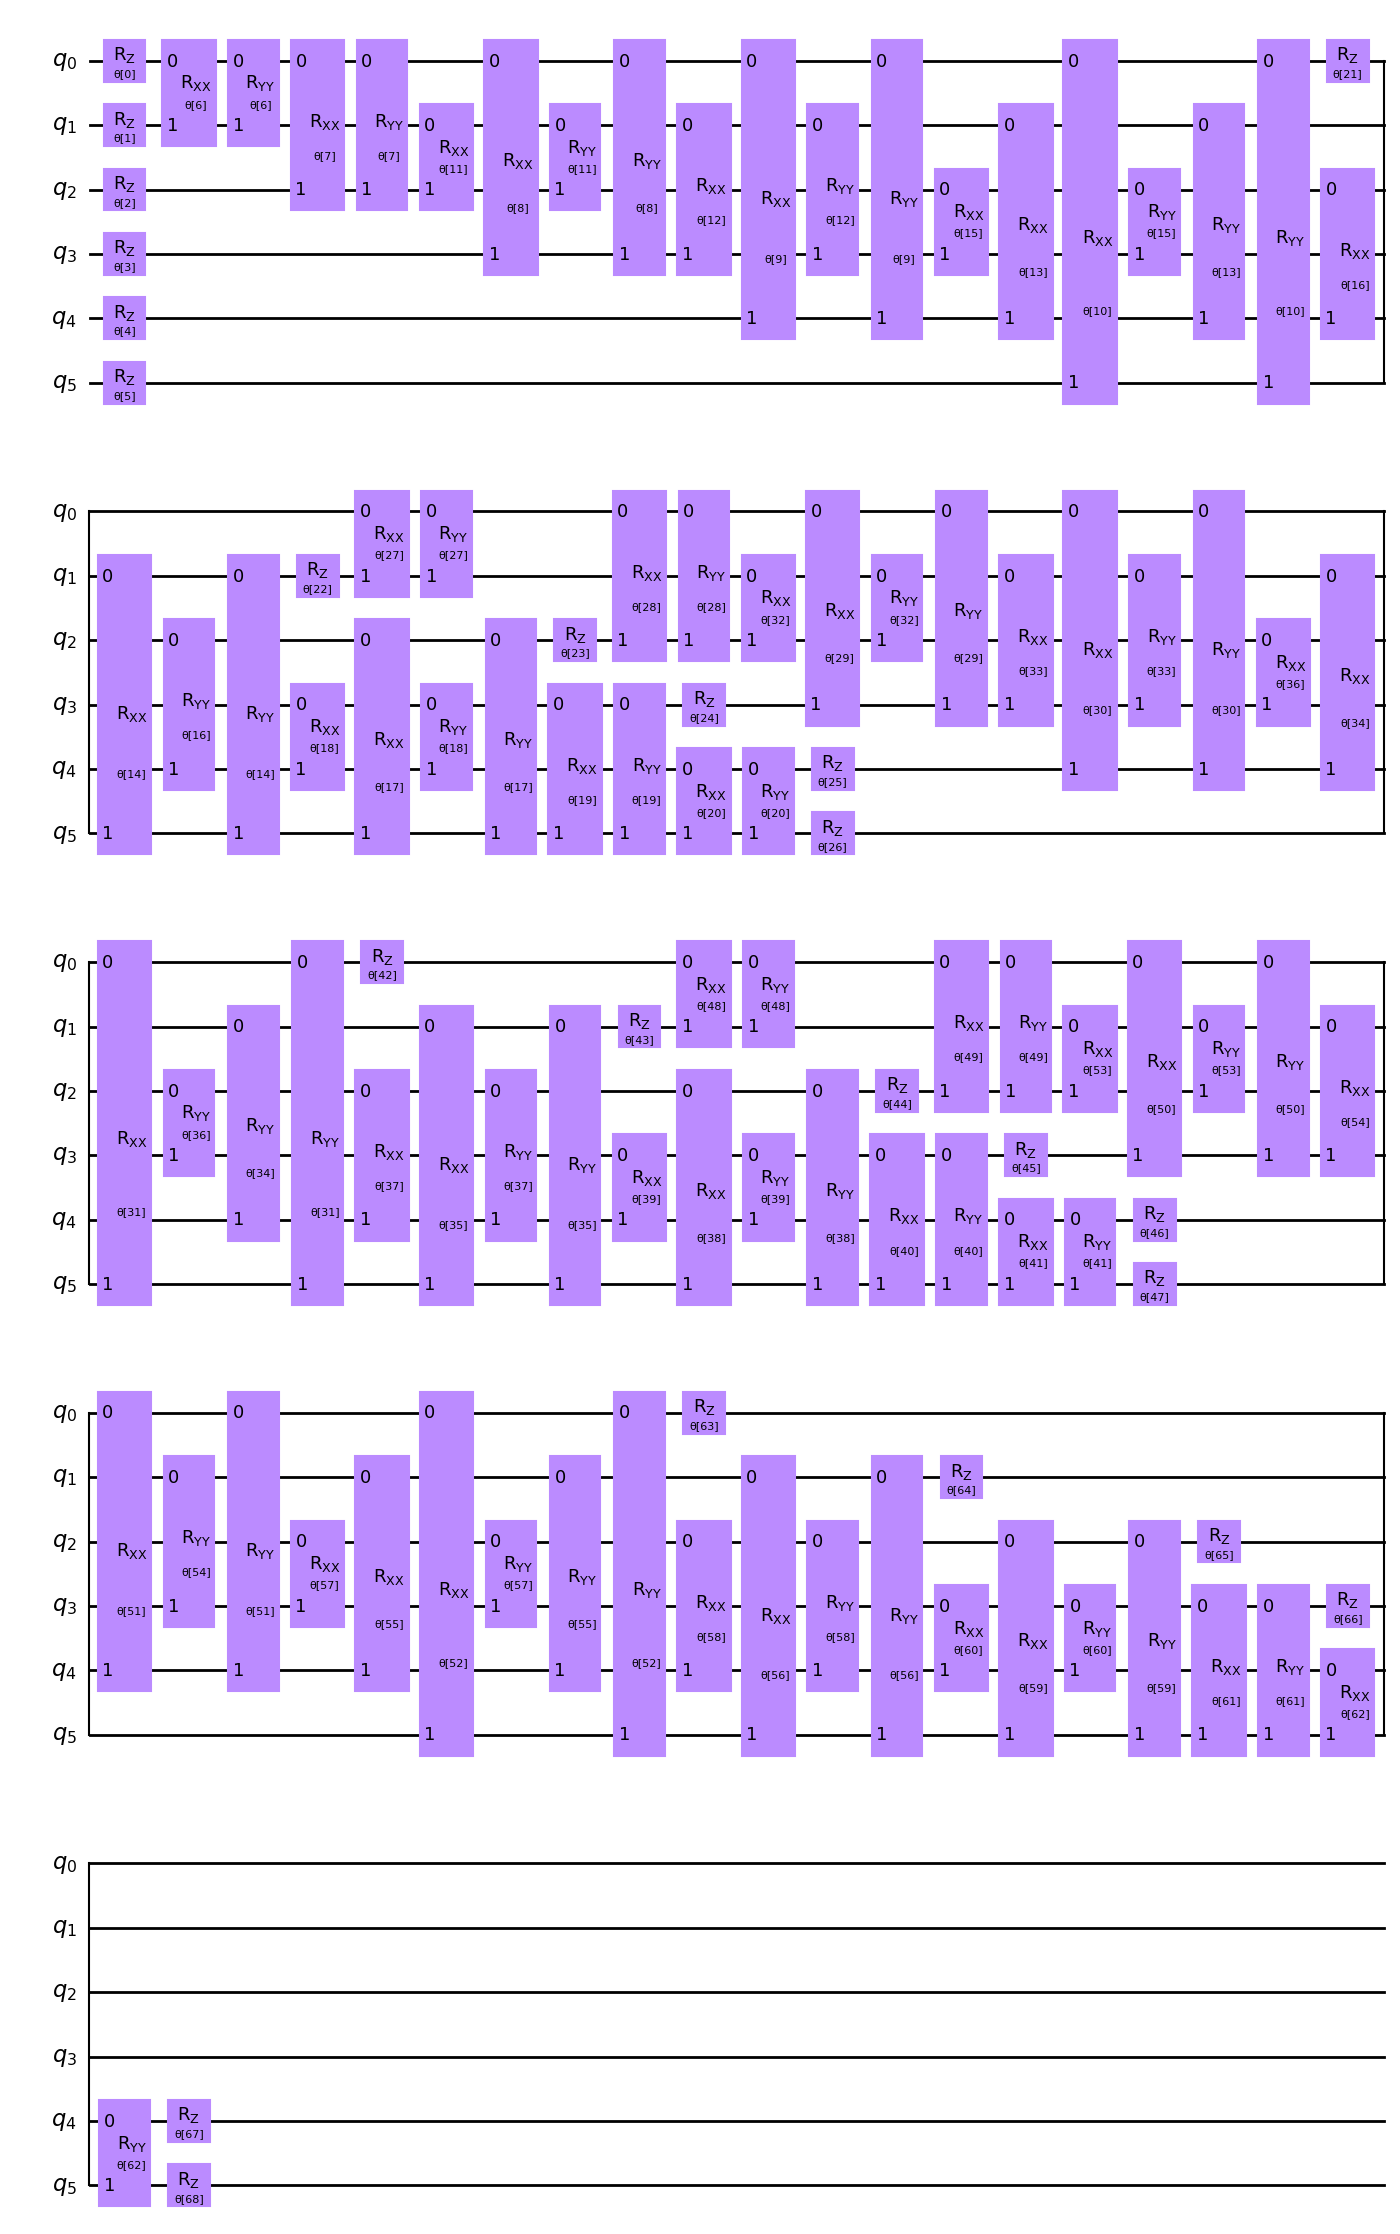

In [45]:
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(num_qubits=num_features)
ansatz.decompose().draw(output="mpl", fold=20)

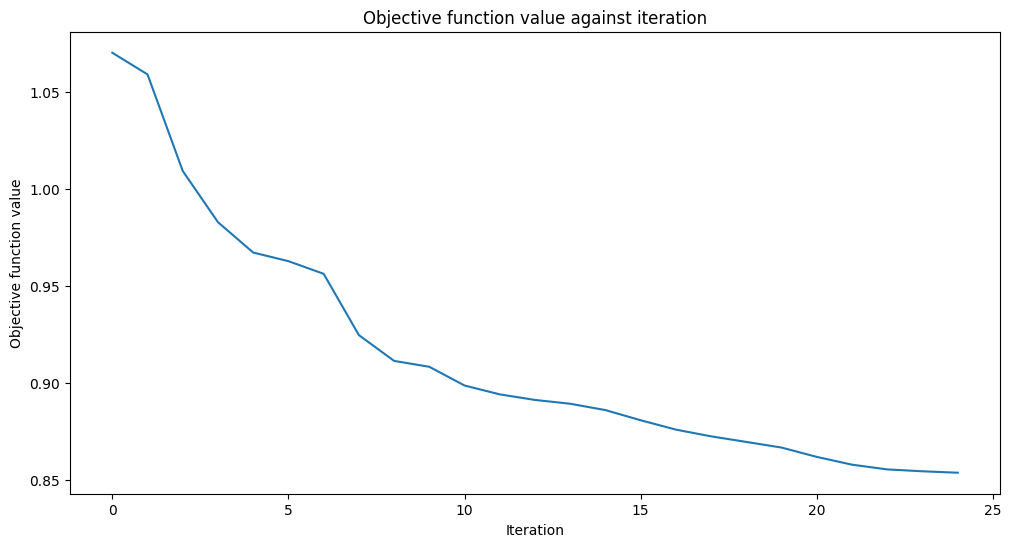

Training time: 13401 seconds


In [46]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

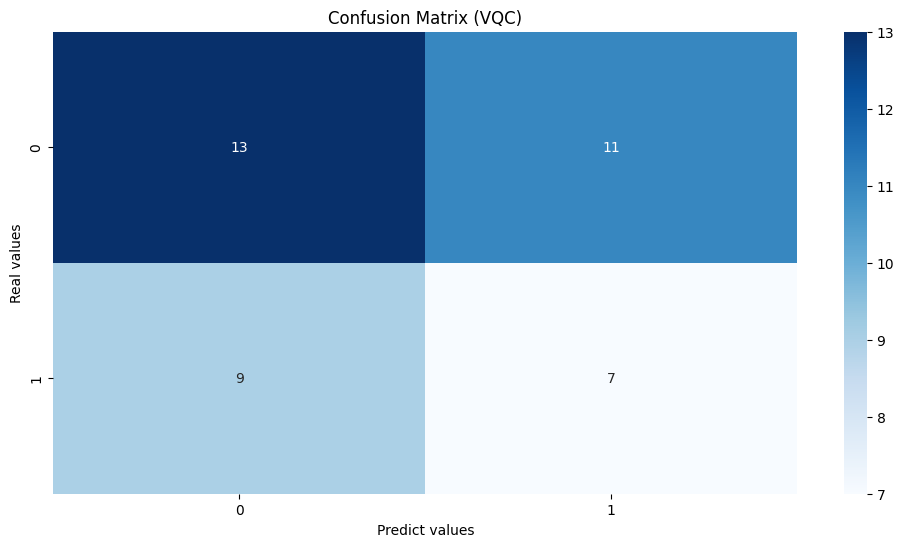

In [47]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [48]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.75
Quantum VQC on the test dataset:     0.50


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test_np, q_predictions,digits=6))

              precision    recall  f1-score   support

           0   0.590909  0.541667  0.565217        24
           1   0.388889  0.437500  0.411765        16

    accuracy                       0.500000        40
   macro avg   0.489899  0.489583  0.488491        40
weighted avg   0.510101  0.500000  0.503836        40



## COBYLA

In [50]:
from qiskit.algorithms.optimizers import COBYLA
optimizer = COBYLA(maxiter=100)

c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


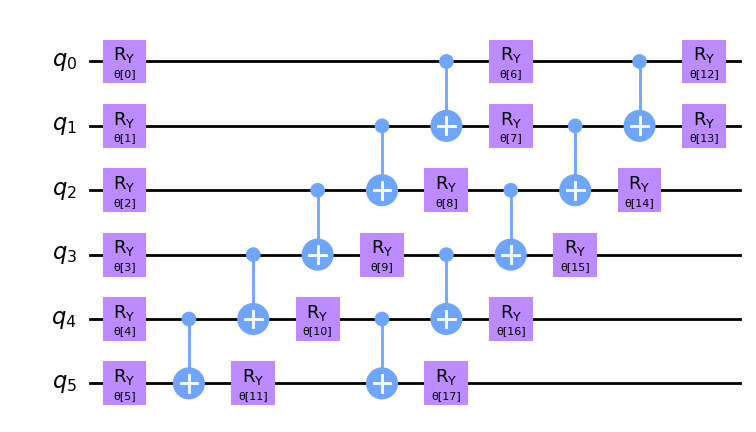

In [51]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

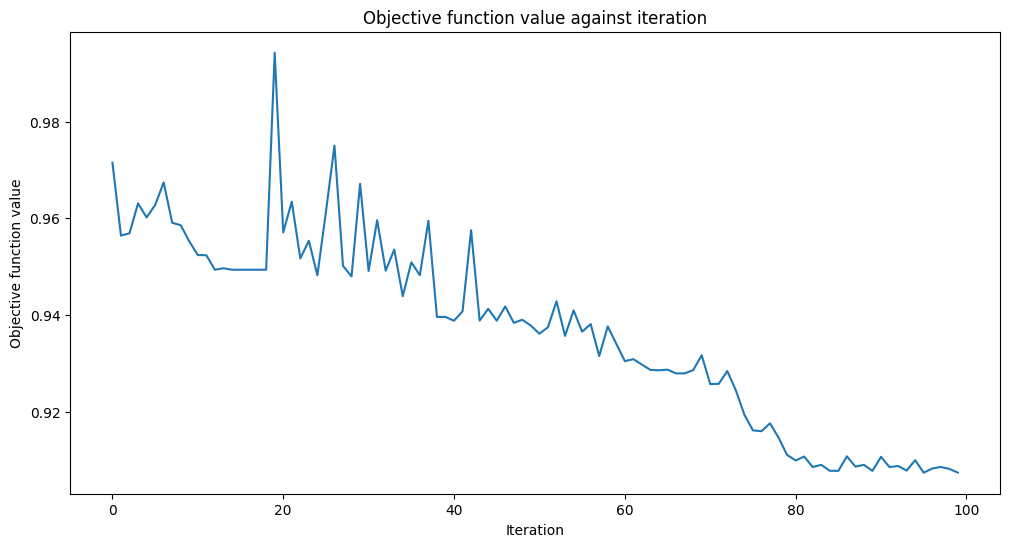

Training time: 549 seconds


In [52]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

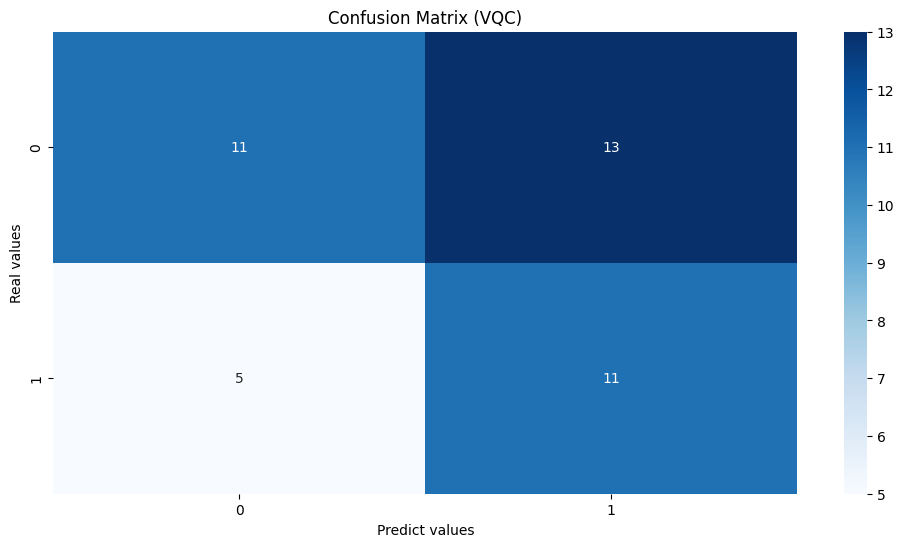

In [53]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [54]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.66
Quantum VQC on the test dataset:     0.55


In [55]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.687500  0.458333  0.550000        24
           1   0.458333  0.687500  0.550000        16

    accuracy                       0.550000        40
   macro avg   0.572917  0.572917  0.550000        40
weighted avg   0.595833  0.550000  0.550000        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


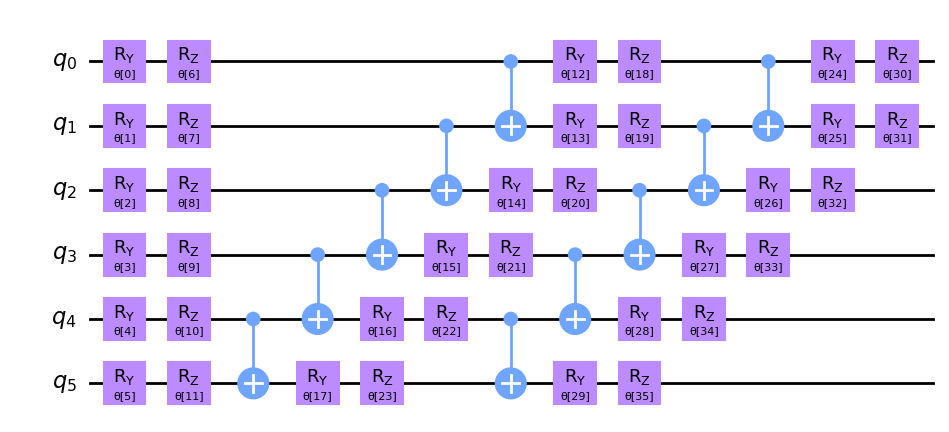

In [56]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

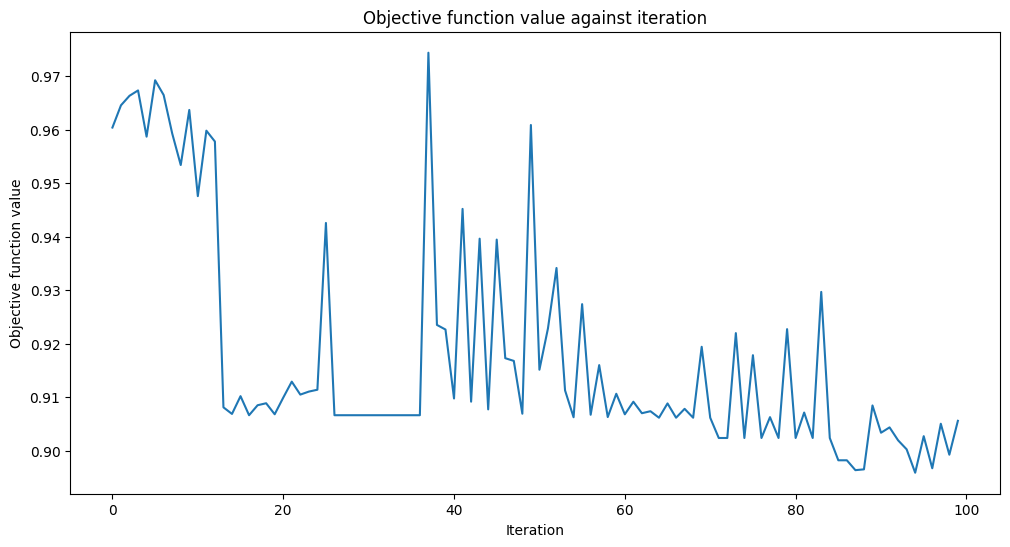

Training time: 594 seconds


In [57]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

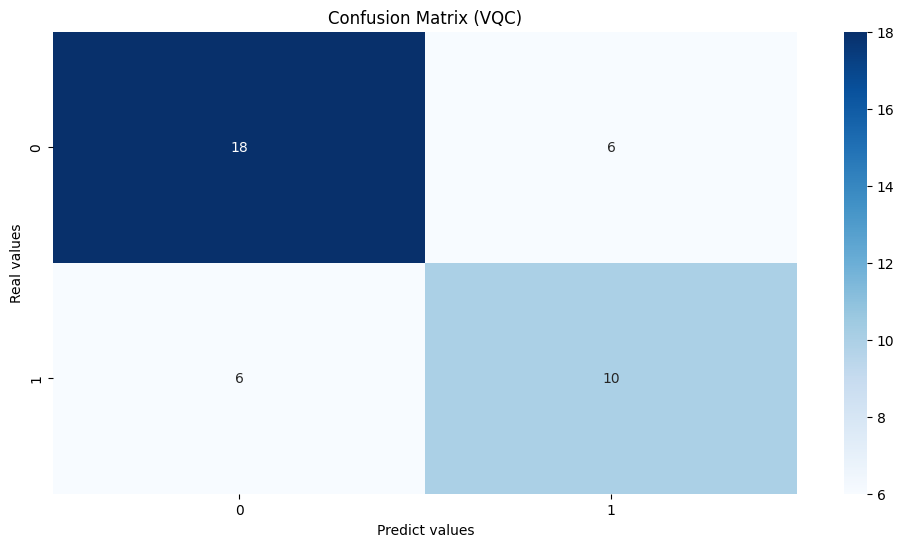

In [58]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [59]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.70
Quantum VQC on the test dataset:     0.70


In [60]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.750000  0.750000  0.750000        24
           1   0.625000  0.625000  0.625000        16

    accuracy                       0.700000        40
   macro avg   0.687500  0.687500  0.687500        40
weighted avg   0.700000  0.700000  0.700000        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


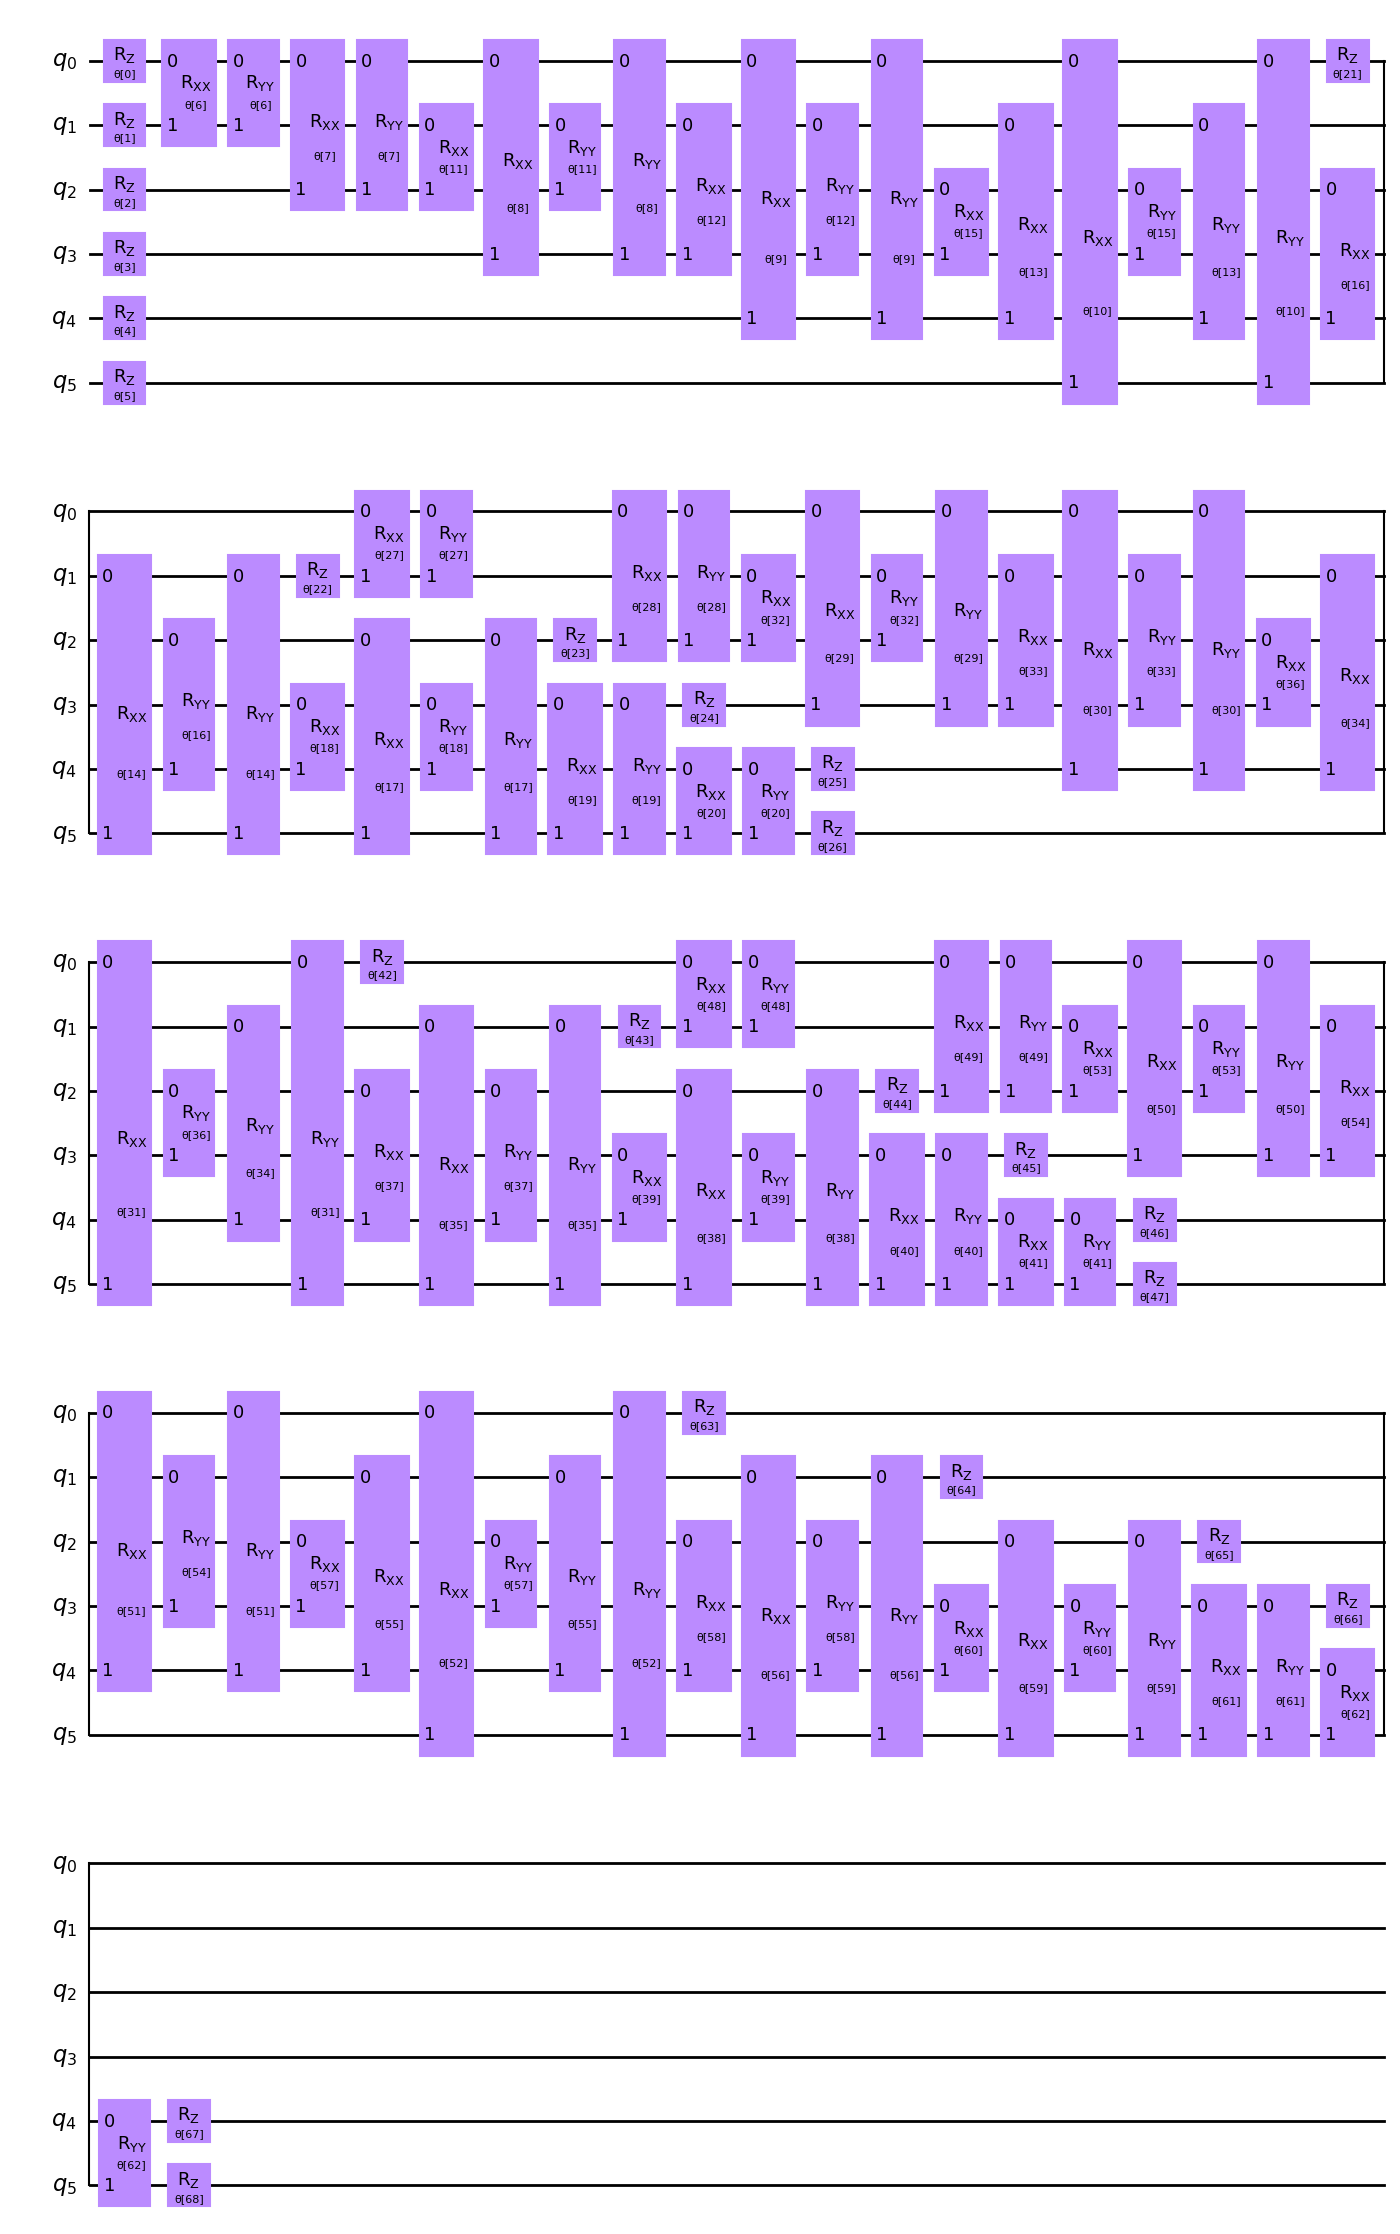

In [61]:
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(num_qubits=num_features)
ansatz.decompose().draw(output="mpl", fold=20)

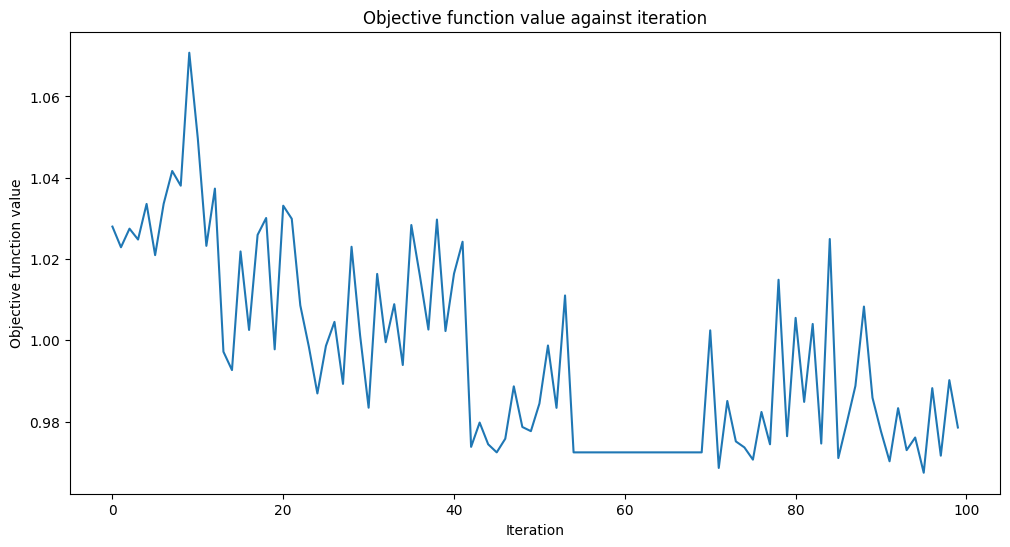

Training time: 736 seconds


In [62]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

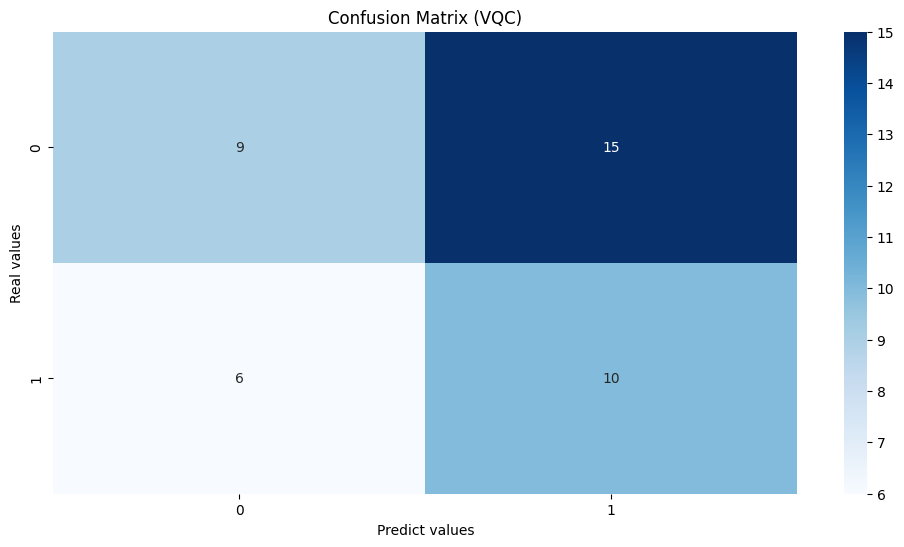

In [63]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [64]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.60
Quantum VQC on the test dataset:     0.47


In [65]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.600000  0.375000  0.461538        24
           1   0.400000  0.625000  0.487805        16

    accuracy                       0.475000        40
   macro avg   0.500000  0.500000  0.474672        40
weighted avg   0.520000  0.475000  0.472045        40



## Gradiant Descents

In [66]:
from qiskit.algorithms.optimizers import GradientDescent
optimizer = GradientDescent(maxiter=25)

c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


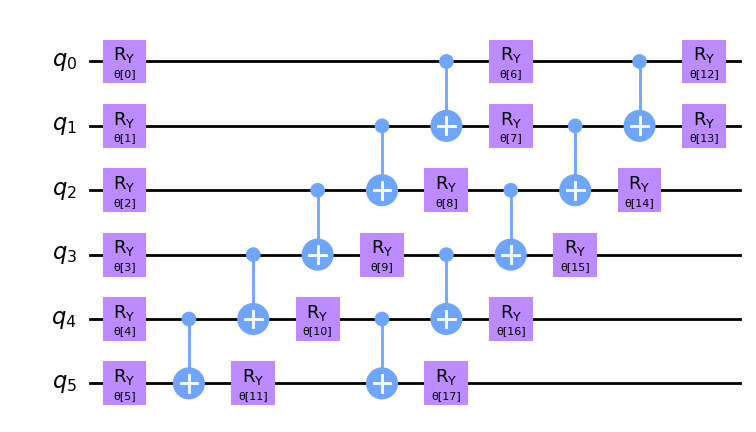

In [67]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

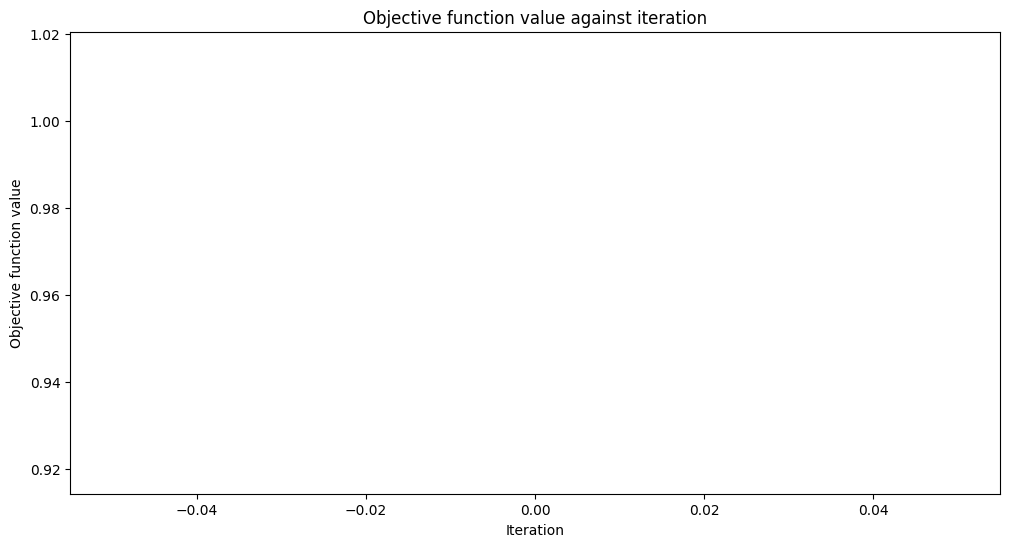

Training time: 1173 seconds


In [68]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

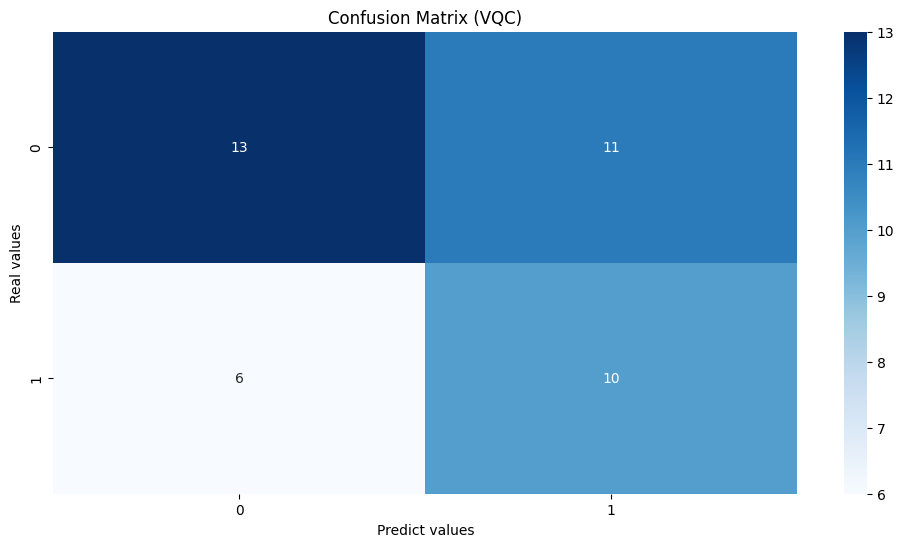

In [69]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [70]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.61
Quantum VQC on the test dataset:     0.57


In [71]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.684211  0.541667  0.604651        24
           1   0.476190  0.625000  0.540541        16

    accuracy                       0.575000        40
   macro avg   0.580201  0.583333  0.572596        40
weighted avg   0.601003  0.575000  0.579007        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


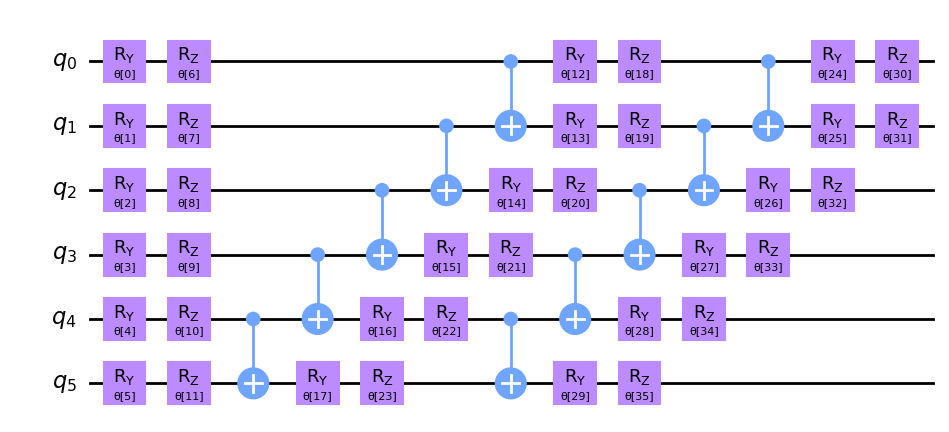

In [72]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

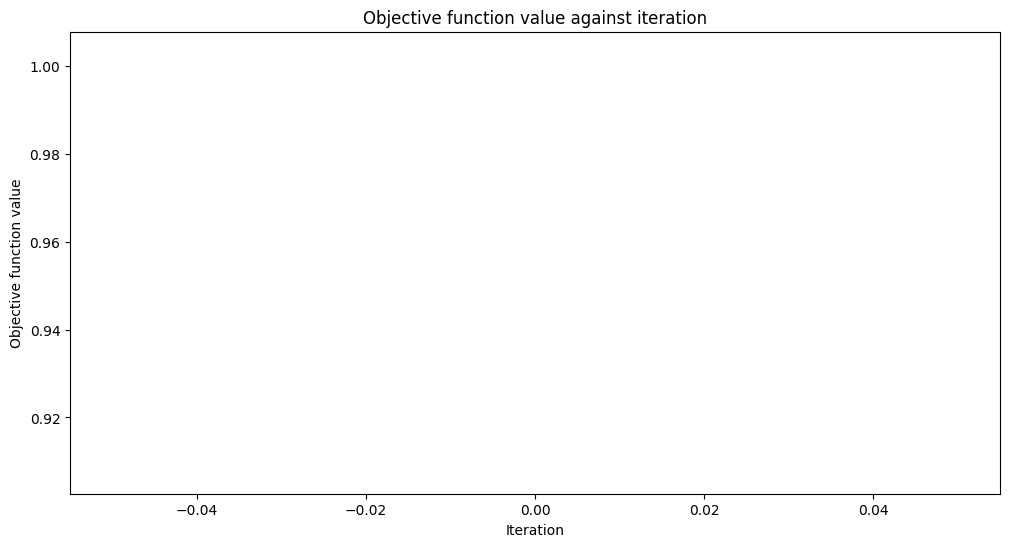

Training time: 2566 seconds


In [73]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

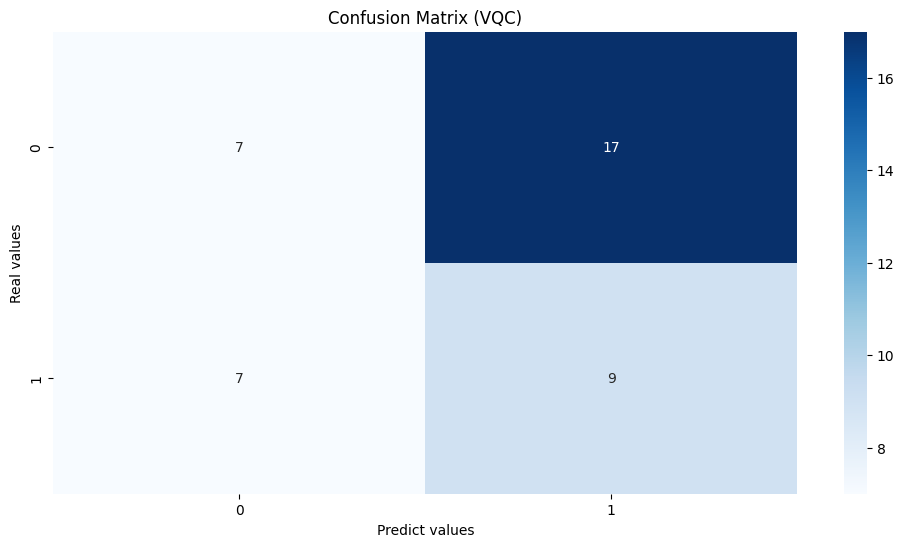

In [74]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [75]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.62
Quantum VQC on the test dataset:     0.40


In [76]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.500000  0.291667  0.368421        24
           1   0.346154  0.562500  0.428571        16

    accuracy                       0.400000        40
   macro avg   0.423077  0.427083  0.398496        40
weighted avg   0.438462  0.400000  0.392481        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


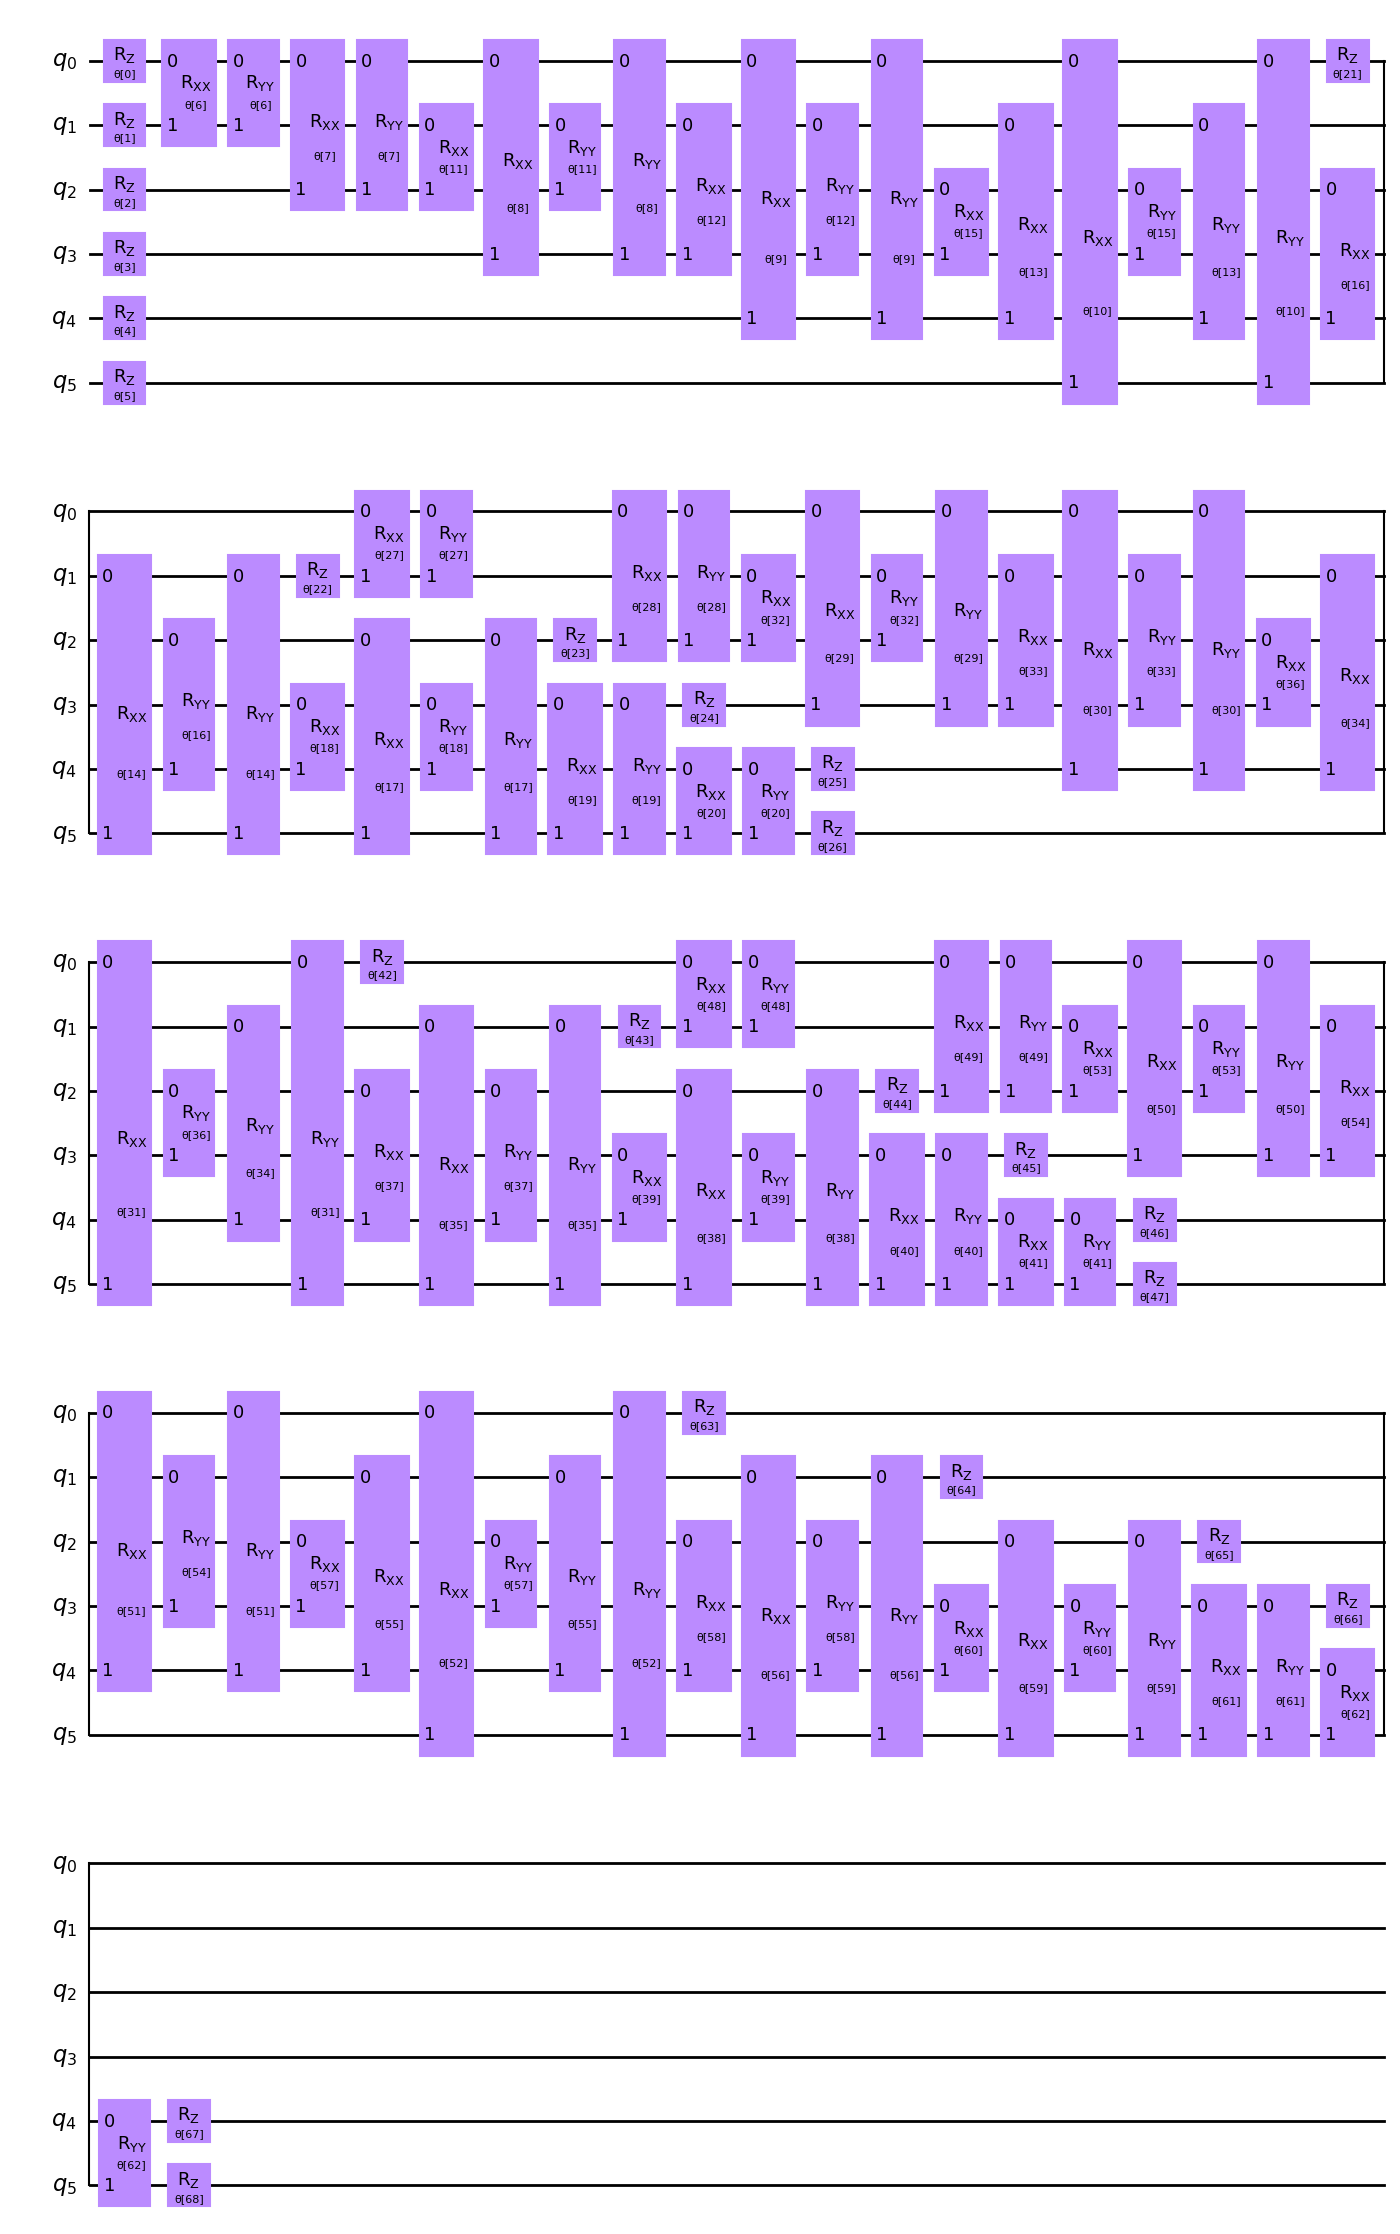

In [77]:
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(num_qubits=num_features)
ansatz.decompose().draw(output="mpl", fold=20)

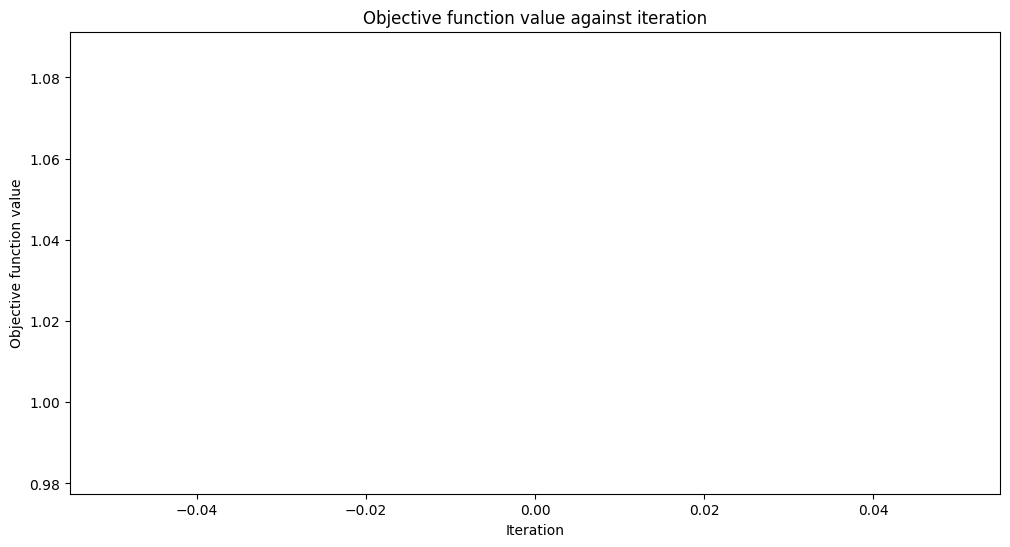

Training time: 13316 seconds


In [78]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

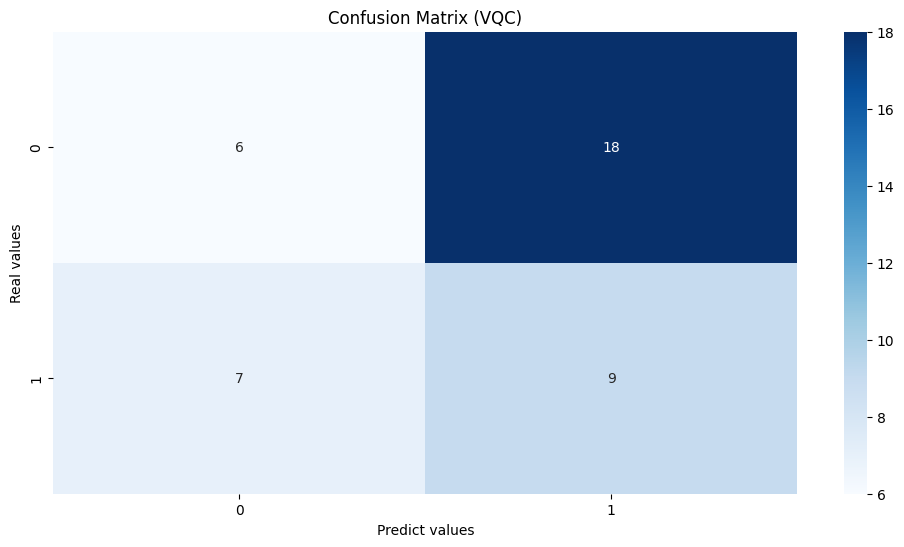

In [79]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [80]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.49
Quantum VQC on the test dataset:     0.38


In [81]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.461538  0.250000  0.324324        24
           1   0.333333  0.562500  0.418605        16

    accuracy                       0.375000        40
   macro avg   0.397436  0.406250  0.371464        40
weighted avg   0.410256  0.375000  0.362036        40



## SPSA

In [82]:
from qiskit.algorithms.optimizers import SPSA
optimizer = SPSA(maxiter=100)

c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


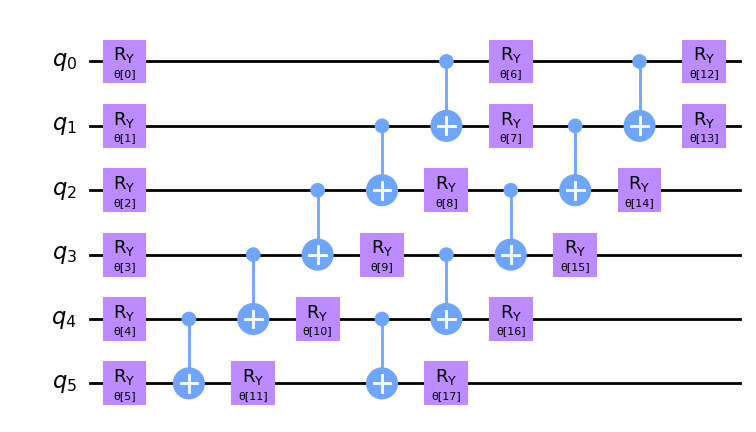

In [83]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

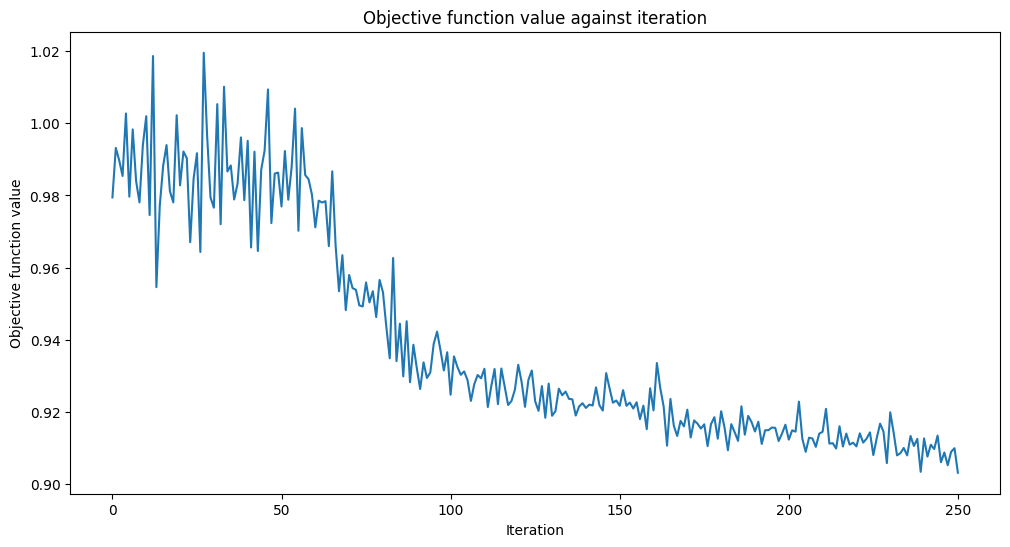

Training time: 2625 seconds


In [84]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

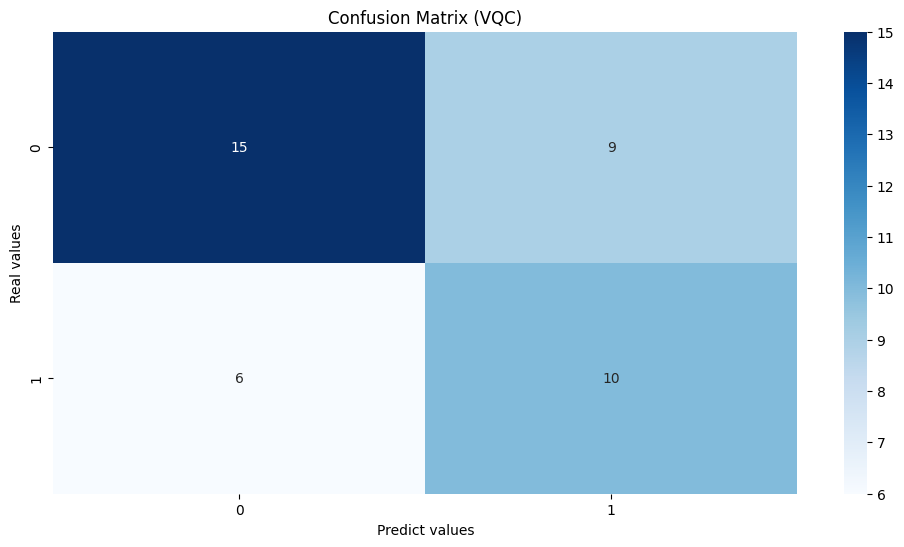

In [85]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [86]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.70
Quantum VQC on the test dataset:     0.62


In [87]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.714286  0.625000  0.666667        24
           1   0.526316  0.625000  0.571429        16

    accuracy                       0.625000        40
   macro avg   0.620301  0.625000  0.619048        40
weighted avg   0.639098  0.625000  0.628571        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


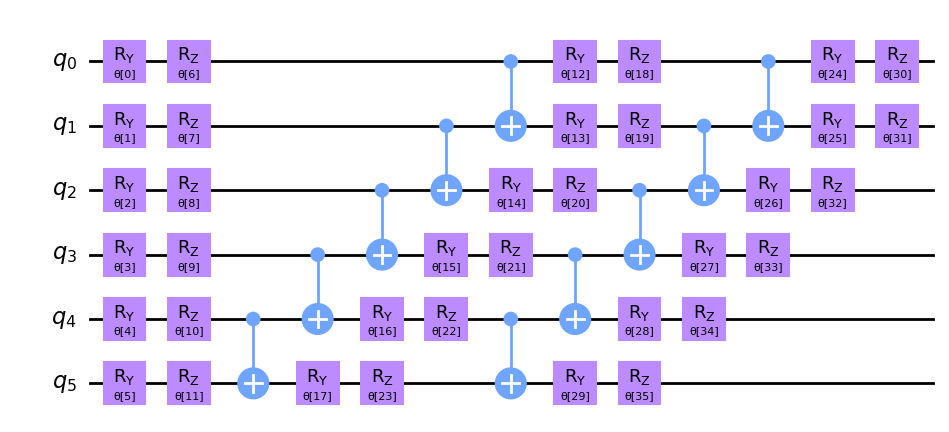

In [88]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

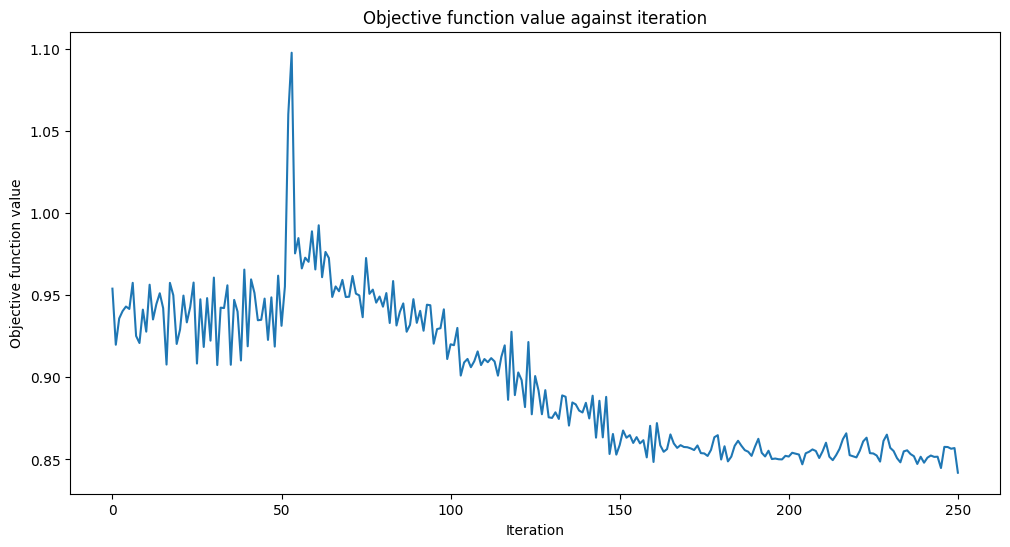

Training time: 3006 seconds


In [89]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

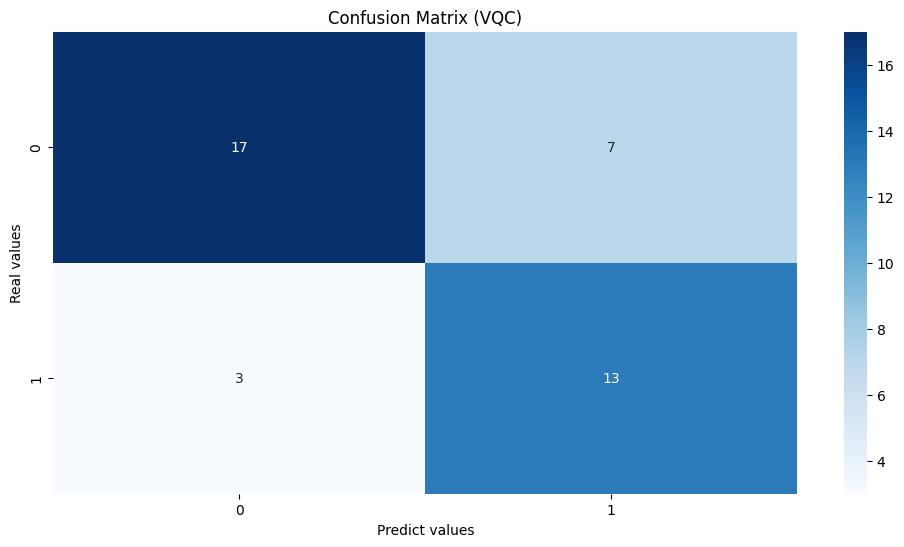

In [90]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [91]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.74
Quantum VQC on the test dataset:     0.75


In [92]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.850000  0.708333  0.772727        24
           1   0.650000  0.812500  0.722222        16

    accuracy                       0.750000        40
   macro avg   0.750000  0.760417  0.747475        40
weighted avg   0.770000  0.750000  0.752525        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


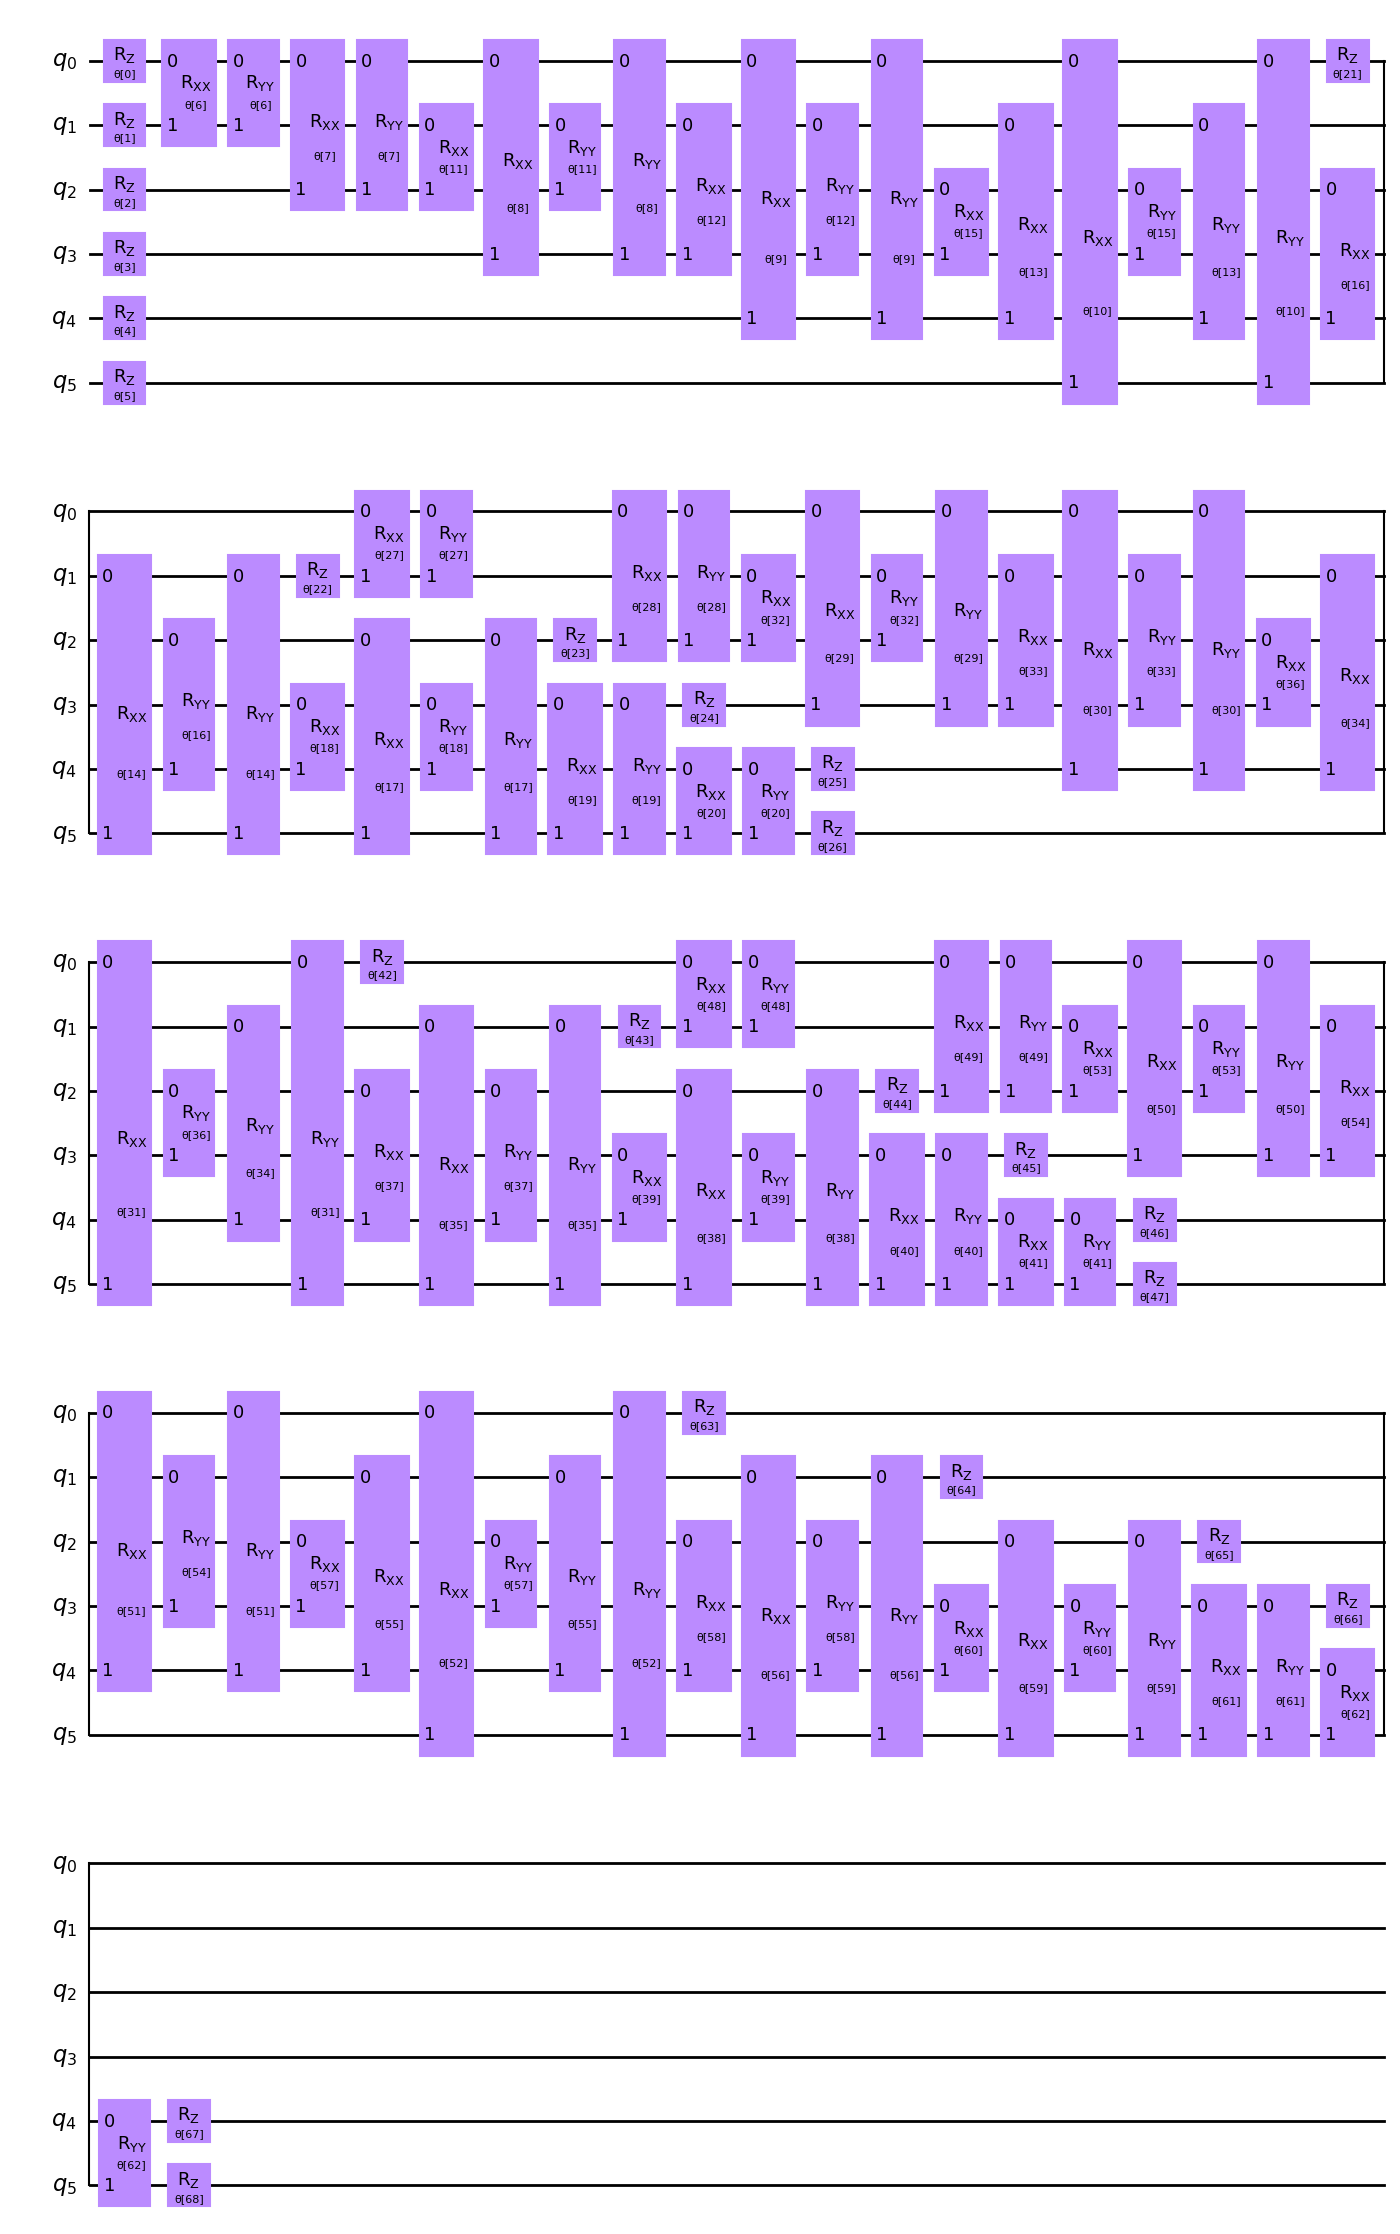

In [93]:
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(num_qubits=num_features)
ansatz.decompose().draw(output="mpl", fold=20)

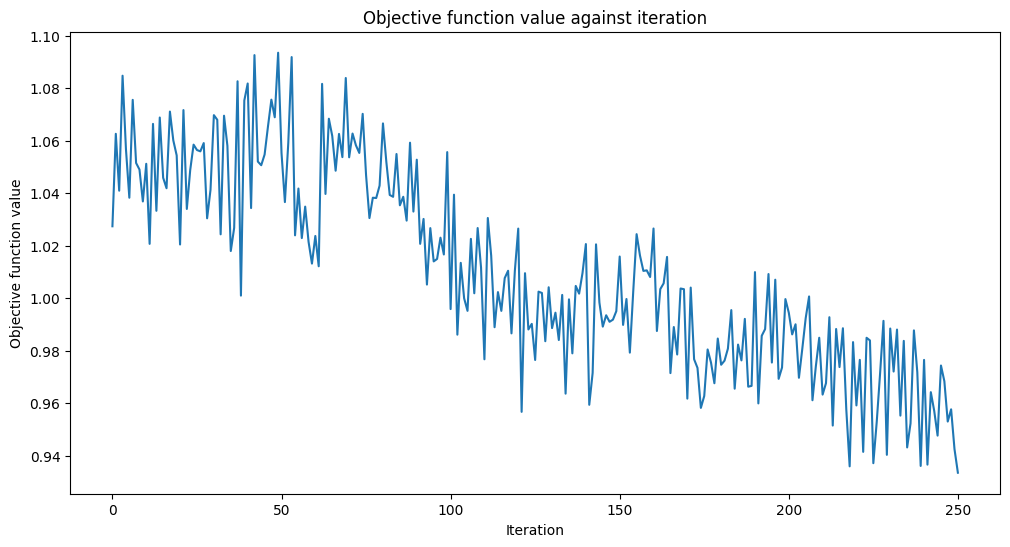

Training time: 1992 seconds


In [94]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

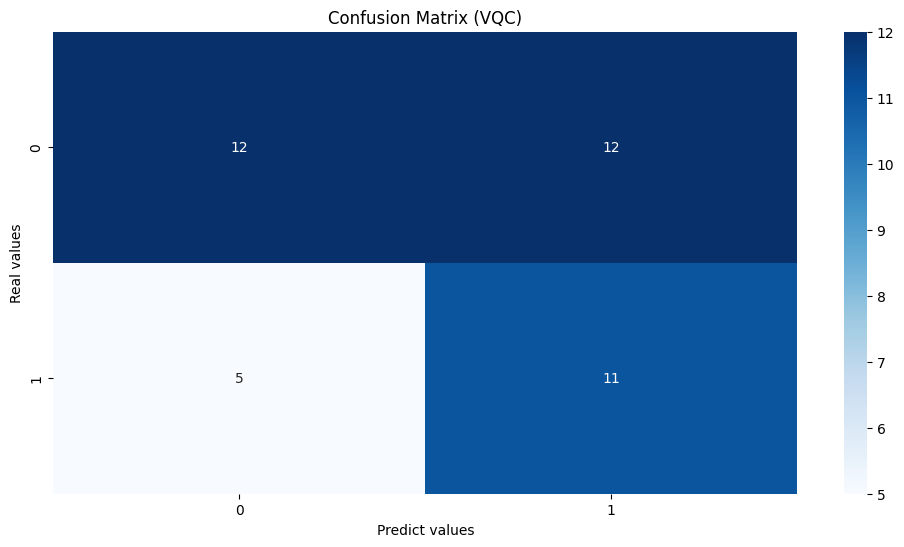

In [95]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [96]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.69
Quantum VQC on the test dataset:     0.57


In [97]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.705882  0.500000  0.585366        24
           1   0.478261  0.687500  0.564103        16

    accuracy                       0.575000        40
   macro avg   0.592072  0.593750  0.574734        40
weighted avg   0.614834  0.575000  0.576861        40



## UTILIZANDO PEGASUS

In [98]:
import numpy as np
X_train_np = np.array(features_train.values)
y_train_np = labels_train.values

In [99]:
import numpy as np
X_test_np = np.array(features_test.values)
y_test_np = labels_test.values

In [100]:
# number of qubits is equal to the number of features
num_qubits = len(features.columns)

# number of steps performed during the training procedure
tau = 100

# regularization parameter
C = 1000

In [101]:
from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.kernels import FidelityQuantumKernel

algorithm_globals.random_seed = 12345

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

C:\Users\estre\AppData\Local\Temp\ipykernel_5228\139360568.py:1: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import BasicAer


In [102]:
from qiskit_machine_learning.algorithms import PegasosQSVC
import time
np.random.seed(123)
pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)

# training
start = time.time()
pegasos_qsvc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

# testing
pegasos_score = pegasos_qsvc.score(X_test_np, y_test_np)
print(f"PegasosQSVC classification test score: {pegasos_score}")

Training time: 5 seconds
PegasosQSVC classification test score: 0.925


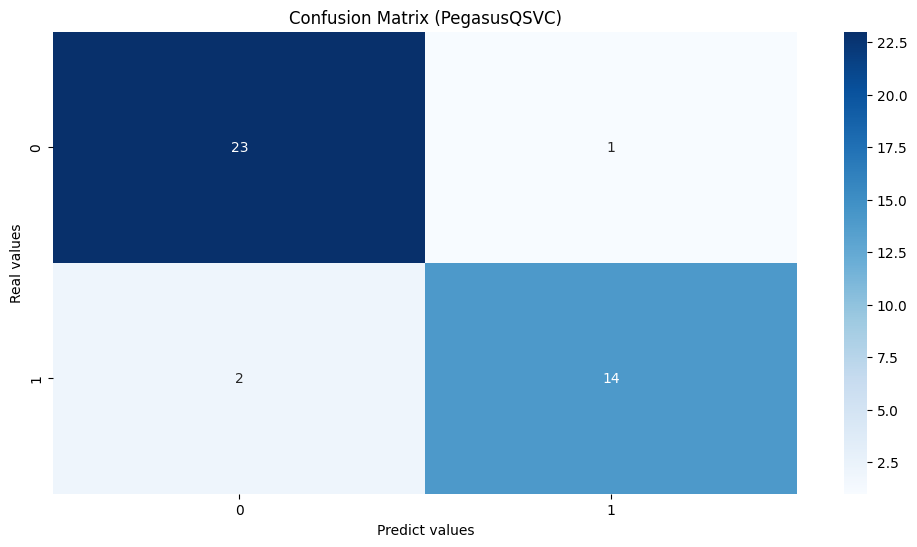

In [103]:
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.metrics import confusion_matrix
q_predictions = pegasos_qsvc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (PegasusQSVC)")
plot.show()

In [104]:
train_score_q4 = pegasos_qsvc.score(X_train_np, y_train_np)
test_score_q4 = pegasos_qsvc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.84
Quantum VQC on the test dataset:     0.93


In [105]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.920000  0.958333  0.938776        24
           1   0.933333  0.875000  0.903226        16

    accuracy                       0.925000        40
   macro avg   0.926667  0.916667  0.921001        40
weighted avg   0.925333  0.925000  0.924556        40



## QSVC

In [106]:
from qiskit_machine_learning.algorithms import QSVC
from sklearn import metrics
import time
# Use QSVC for classification
qsvc = QSVC(quantum_kernel=qkernel)

# Fit the QSVC
start = time.time()
qsvc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

# Predict the labels
labels_test = qsvc.predict(X_test_np)

# Evalaute the test accuracy
accuracy_test = metrics.balanced_accuracy_score(y_true=y_test_np, y_pred=labels_test)
print(f"accuracy test: {accuracy_test}")

accuracy test: 0.9375


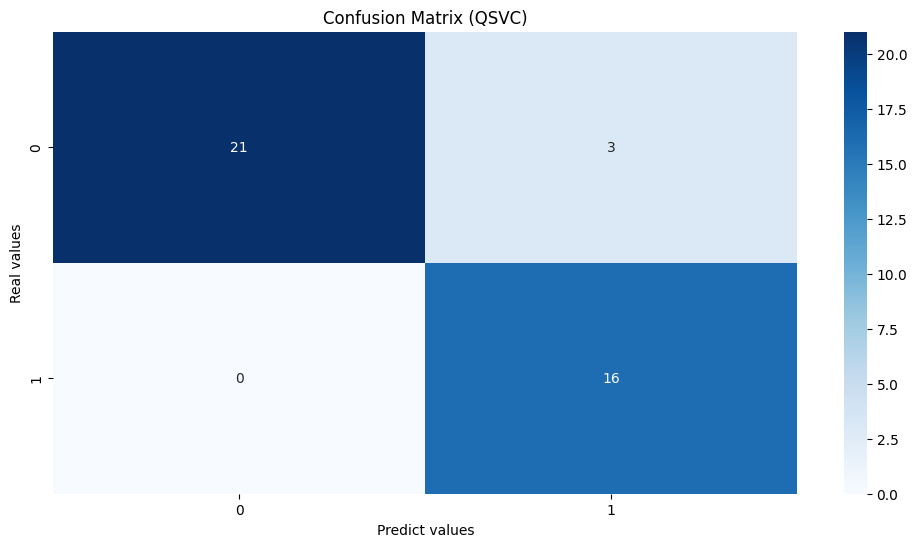

In [107]:
confusion2 = confusion_matrix(y_test_np, labels_test)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (QSVC)")
plot.show()

In [108]:
train_score_q4 = qsvc.score(X_train_np, y_train_np)
test_score_q4 = qsvc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.88
Quantum VQC on the test dataset:     0.93


In [109]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, labels_test, digits=6))

              precision    recall  f1-score   support

           0   1.000000  0.875000  0.933333        24
           1   0.842105  1.000000  0.914286        16

    accuracy                       0.925000        40
   macro avg   0.921053  0.937500  0.923810        40
weighted avg   0.936842  0.925000  0.925714        40

